In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# Dados de tempo


In [45]:
# Todos os valores de tempo encontram-se em segundos.
#Conjunto com 10g de cada lado do carrinho

t_1_10 = [0.384, 0.544, 0.675, 0.779]

t_2_10 = [0.385, 0.545, 0.676, 0.780]

t_3_10 = [0.386, 0.544, 0.674, 0.778]

t_4_10 = [0.387, 0.545, 0.675, 0.779]

t_5_10 = [0.385, 0.545, 0.676, 0.780]

t_10 = [[0.384,0.385,0.386, 0.387, 0.385], [0.544, 0.545, 0.544, 0.545, 0.545], 
        [0.675, 0.676, 0.674, 0.675, 0.676], [0.779, 0.780, 0.778, 0.779, 0.780]]


#Totalizam 20.02g +- 0.01

#Conjunto com 9g de cada lado do carrinho

t_1_9 = [0.380, 0.537, 0.665, 0.768]

t_2_9 = [0.376, 0.533, 0.662, 0.764]

t_3_9 = [0.380, 0.535, 0.663, 0.765]

t_4_9 = [0.378, 0.535, 0.664, 0.766]

t_5_9 = [0.375, 0.532, 0.661, 0.763]

t_9 = [[0.380, 0.376, 0.380, 0.378, 0.375], [0.537, 0.533, 0.535, 0.535, 0.532],
      [0.665, 0.662, 0.663, 0.664, 0.661], [0.768, 0.764, 0.765, 0.766, 0.763]]

#Totalizam 18.08g +- 0.01 (9.04g em cada lado do carrinho)

#Conjunto com 8g de cada lado do carrinho

t_1_8 = [0.372, 0.526, 0.653, 0.753]

t_2_8 = [0.373, 0.526, 0.652, 0.752]

t_3_8 = [0.371, 0.525, 0.652, 0.752]

t_4_8 = [0.368, 0.523, 0.650, 0.750]

t_5_8 = [0.370, 0.525, 0.651, 0.752]

t_8 = [[0.372, 0.373, 0.371, 0.368, 0.370], [0.526, 0.526, 0.525, 0.523, 0.525],
      [0.653, 0.652, 0.652, 0.650, 0.651], [0.753, 0.752, 0.752, 0.750, 0.752]]

#Totalizam 16g

#Conjunto com 7g de cada lado do carrinho

t_1_7 = [0.365, 0.517, 0.642, 0.740]

t_2_7 = [0.370, 0.523, 0.637, 0.741]

t_3_7 = [0.371, 0.524, 0.639, 0.742]

t_4_7 = [0.372, 0.524, 0.639, 0.740]

t_5_7 = [0.370, 0.523, 0.638, 0.739]

t_7 = [[0.365, 0.370, 0.371, 0.372, 0.370], [0.517, 0.523, 0.524, 0.524, 0.523],
      [0.642, 0.637, 0.639, 0.639, 0.638], [0.740, 0.741, 0.742, 0.740, 0.739]]

#Totalizam 14g

#Conjunto com 6g de cada lado do carrinho

t_1_6 = [0.365, 0.516, 0.629, 0.728]

t_2_6 = [0.365, 0.525, 0.628, 0.728]

t_3_6 = [0.364, 0.515, 0.628, 0.727]

t_4_6 = [0.365, 0.516, 0.629, 0.728]

t_5_6 = [0.365, 0.515, 0.628, 0.728]

t_6 = [[0.365, 0.365, 0.364, 0.365, 0.365], [0.516, 0.525, 0.515, 0.516, 0.515],
      [0.629, 0.628, 0.628, 0.629, 0.628], [0.728, 0.728, 0.727, 0.728, 0.728]]

#Totalizam 12g

#Conjunto com 5g de cada lado do carrinho

t_1_5 = [0.360, 0.508, 0.620, 0.717]

t_2_5 = [0.358, 0.506, 0.618, 0.715]

t_3_5 = [0.359, 0.507, 0.618, 0.716]

t_4_5 = [0.360, 0.508, 0.619, 0.717]

t_5_5 = [0.359, 0.507, 0.618, 0.716]

t_5 = [[0.360, 0.358, 0.359, 0.360, 0.359], [0.508, 0.506, 0.507, 0.508, 0.507],
      [0.620, 0.618, 0.618, 0.619, 0.618], [0.717, 0.715, 0.716, 0.717, 0.716]]

#Totalizam 10g

#S2 TE AMO MUITO MUITO S2 S2 S2 S2 S2 S2 S2 S2 S2 S2 S2


# Dados de posição

In [46]:
s = np.array([180.5-165.5, 180.5 - 150.5, 180.5 - 135.5, 180.5 - 120.5])*1e-2 #m

sigma_s = np.full(len(s), np.round(np.sqrt(2)*0.05e-2,4))
print(s,sigma_s)


[0.15 0.3  0.45 0.6 ] [0.0007 0.0007 0.0007 0.0007]


# Dados de massa

In [47]:
m_c = [202.14  + 20.08, 202.14  + 18.08, ] #kg
m_s = [54.73e-3, ]

sigma_m_s = 1e-4 #kg
sigma_m_c = np.round(np.sqrt(2)*1e-4,4)



# Valor médio do tempo em cada posição por configuração de massa


In [48]:
#Valor médio do tempo 10g
t_10_mean = np.array([np.mean(t_10[0]), np.mean(t_10[1]), np.mean(t_10[2]), np.mean(t_10[3])])

sigma_10_mean = np.array([np.std(t_10[0])/2, np.std(t_10[1])/2, np.std(t_10[2])/2, np.std(t_10[3])/2])
sigma_10_mean = np.sqrt(sigma_10_mean**2 + 5e-4**2)
sigma_10_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_10_mean]

#Valor médio do tempo 9g
t_9_mean = np.array([np.mean(t_9[0]), np.mean(t_9[1]), np.mean(t_9[2]), np.mean(t_9[3])])

sigma_9_mean = np.array([np.std(t_9[0])/2, np.std(t_9[1])/2, np.std(t_9[2])/2, np.std(t_9[3])/2])
sigma_9_mean = np.sqrt(sigma_9_mean**2 + 5e-4**2)
sigma_9_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_9_mean]

#Valor médio do tempo 8g
t_8_mean = np.array([np.mean(t_8[0]), np.mean(t_8[1]), np.mean(t_8[2]), np.mean(t_8[3])])
sigma_8_mean = np.array([np.std(t_8[0])/2, np.std(t_8[1])/2, np.std(t_8[2])/2, np.std(t_8[3])/2])
sigma_8_mean = np.sqrt(sigma_8_mean**2 + 5e-4**2)
sigma_8_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_8_mean]

#Valor médio do tempo 7g
t_7_mean = np.array([np.mean(t_7[0]), np.mean(t_7[1]), np.mean(t_7[2]), np.mean(t_7[3])])

sigma_7_mean = np.array([np.std(t_7[0])/2, np.std(t_7[1])/2, np.std(t_7[2])/2, np.std(t_7[3])/2])
sigma_7_mean = np.sqrt(sigma_7_mean**2 + 5e-4**2)
sigma_7_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_7_mean]

#Valor médio do tempo 6g
t_6_mean = np.array([np.mean(t_6[0]), np.mean(t_6[1]), np.mean(t_6[2]), np.mean(t_6[3])])
sigma_6_mean = np.array([np.std(t_6[0])/2, np.std(t_6[1])/2, np.std(t_6[2])/2, np.std(t_6[3])/2])
sigma_6_mean = np.sqrt(sigma_6_mean**2 + 5e-4**2)
sigma_6_mean = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_6_mean]

In [49]:
print(sigma_10_mean)

[0.0007, 0.0006, 0.0006, 0.0006]


# Gráficos dos dados brutos

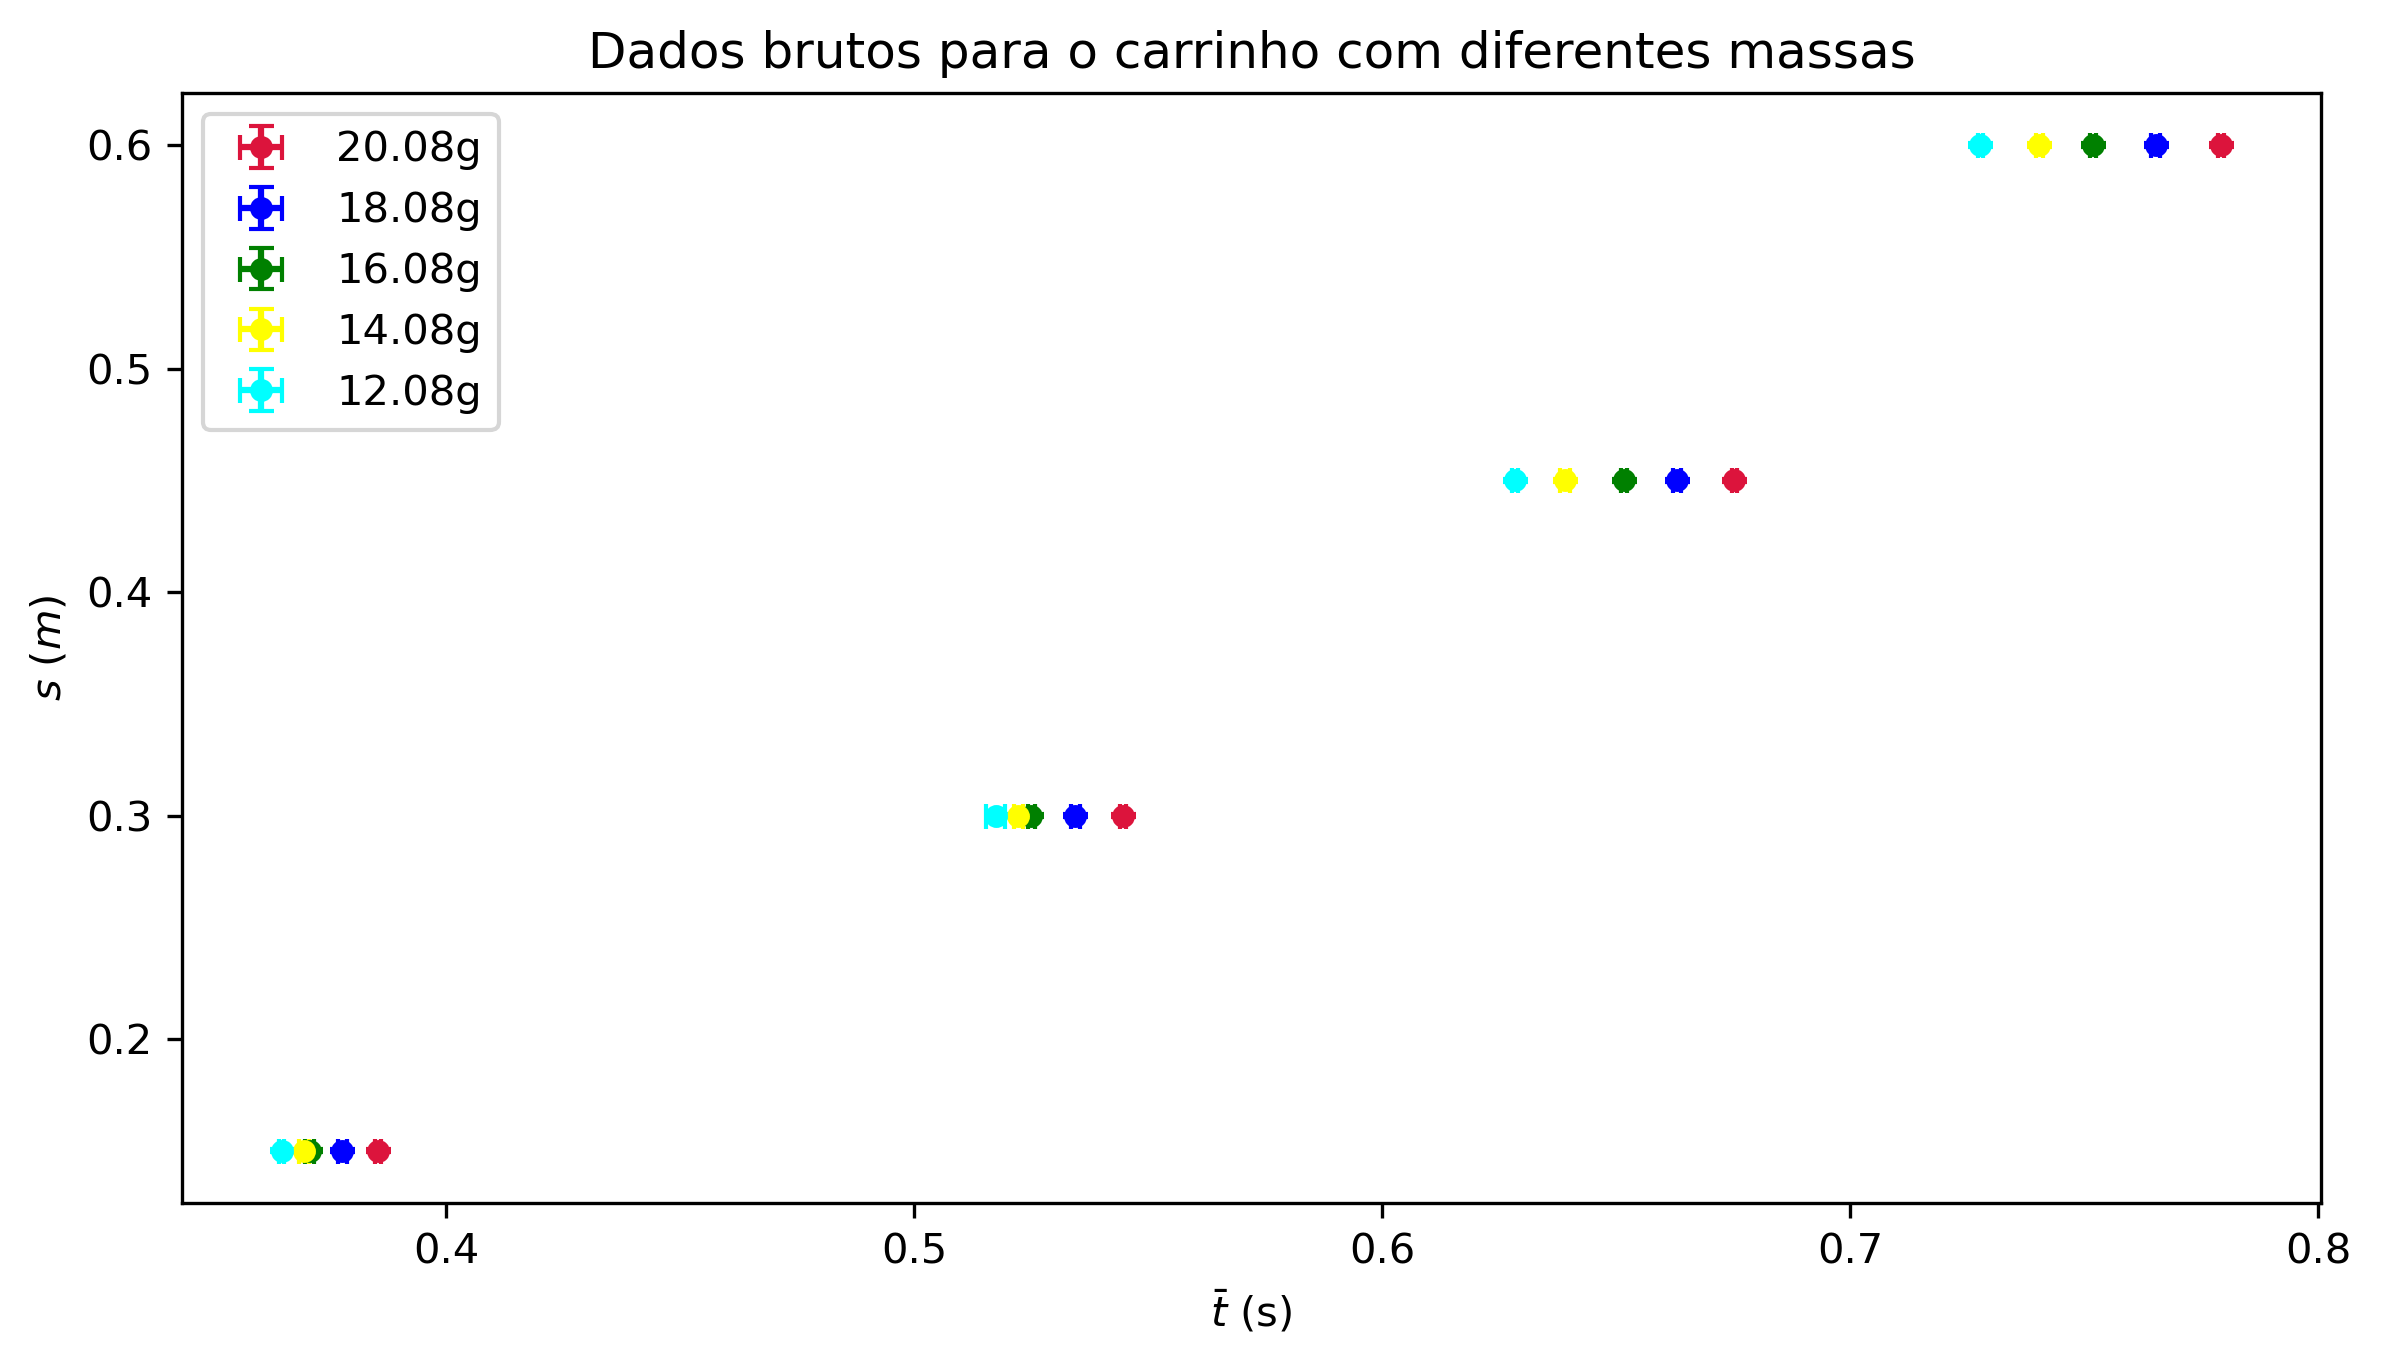

In [50]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_10_mean,s,sigma_s,sigma_10_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = '20.08g')
plt.errorbar(t_9_mean,s,sigma_s,sigma_9_mean, 'o', ms = 4.5, capsize=3, color = 'blue', label = '18.08g')
plt.errorbar(t_8_mean,s,sigma_s,sigma_8_mean, 'o', ms = 4.5, capsize=3, color = 'green', label = '16.08g')
plt.errorbar(t_7_mean,s,sigma_s,sigma_7_mean, 'o', ms = 4.5, capsize=3, color = 'yellow', label = '14.08g')
plt.errorbar(t_6_mean,s,sigma_s,sigma_6_mean, 'o', ms = 4.5, capsize=3, color = 'cyan', label = '12.08g')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com diferentes massas')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

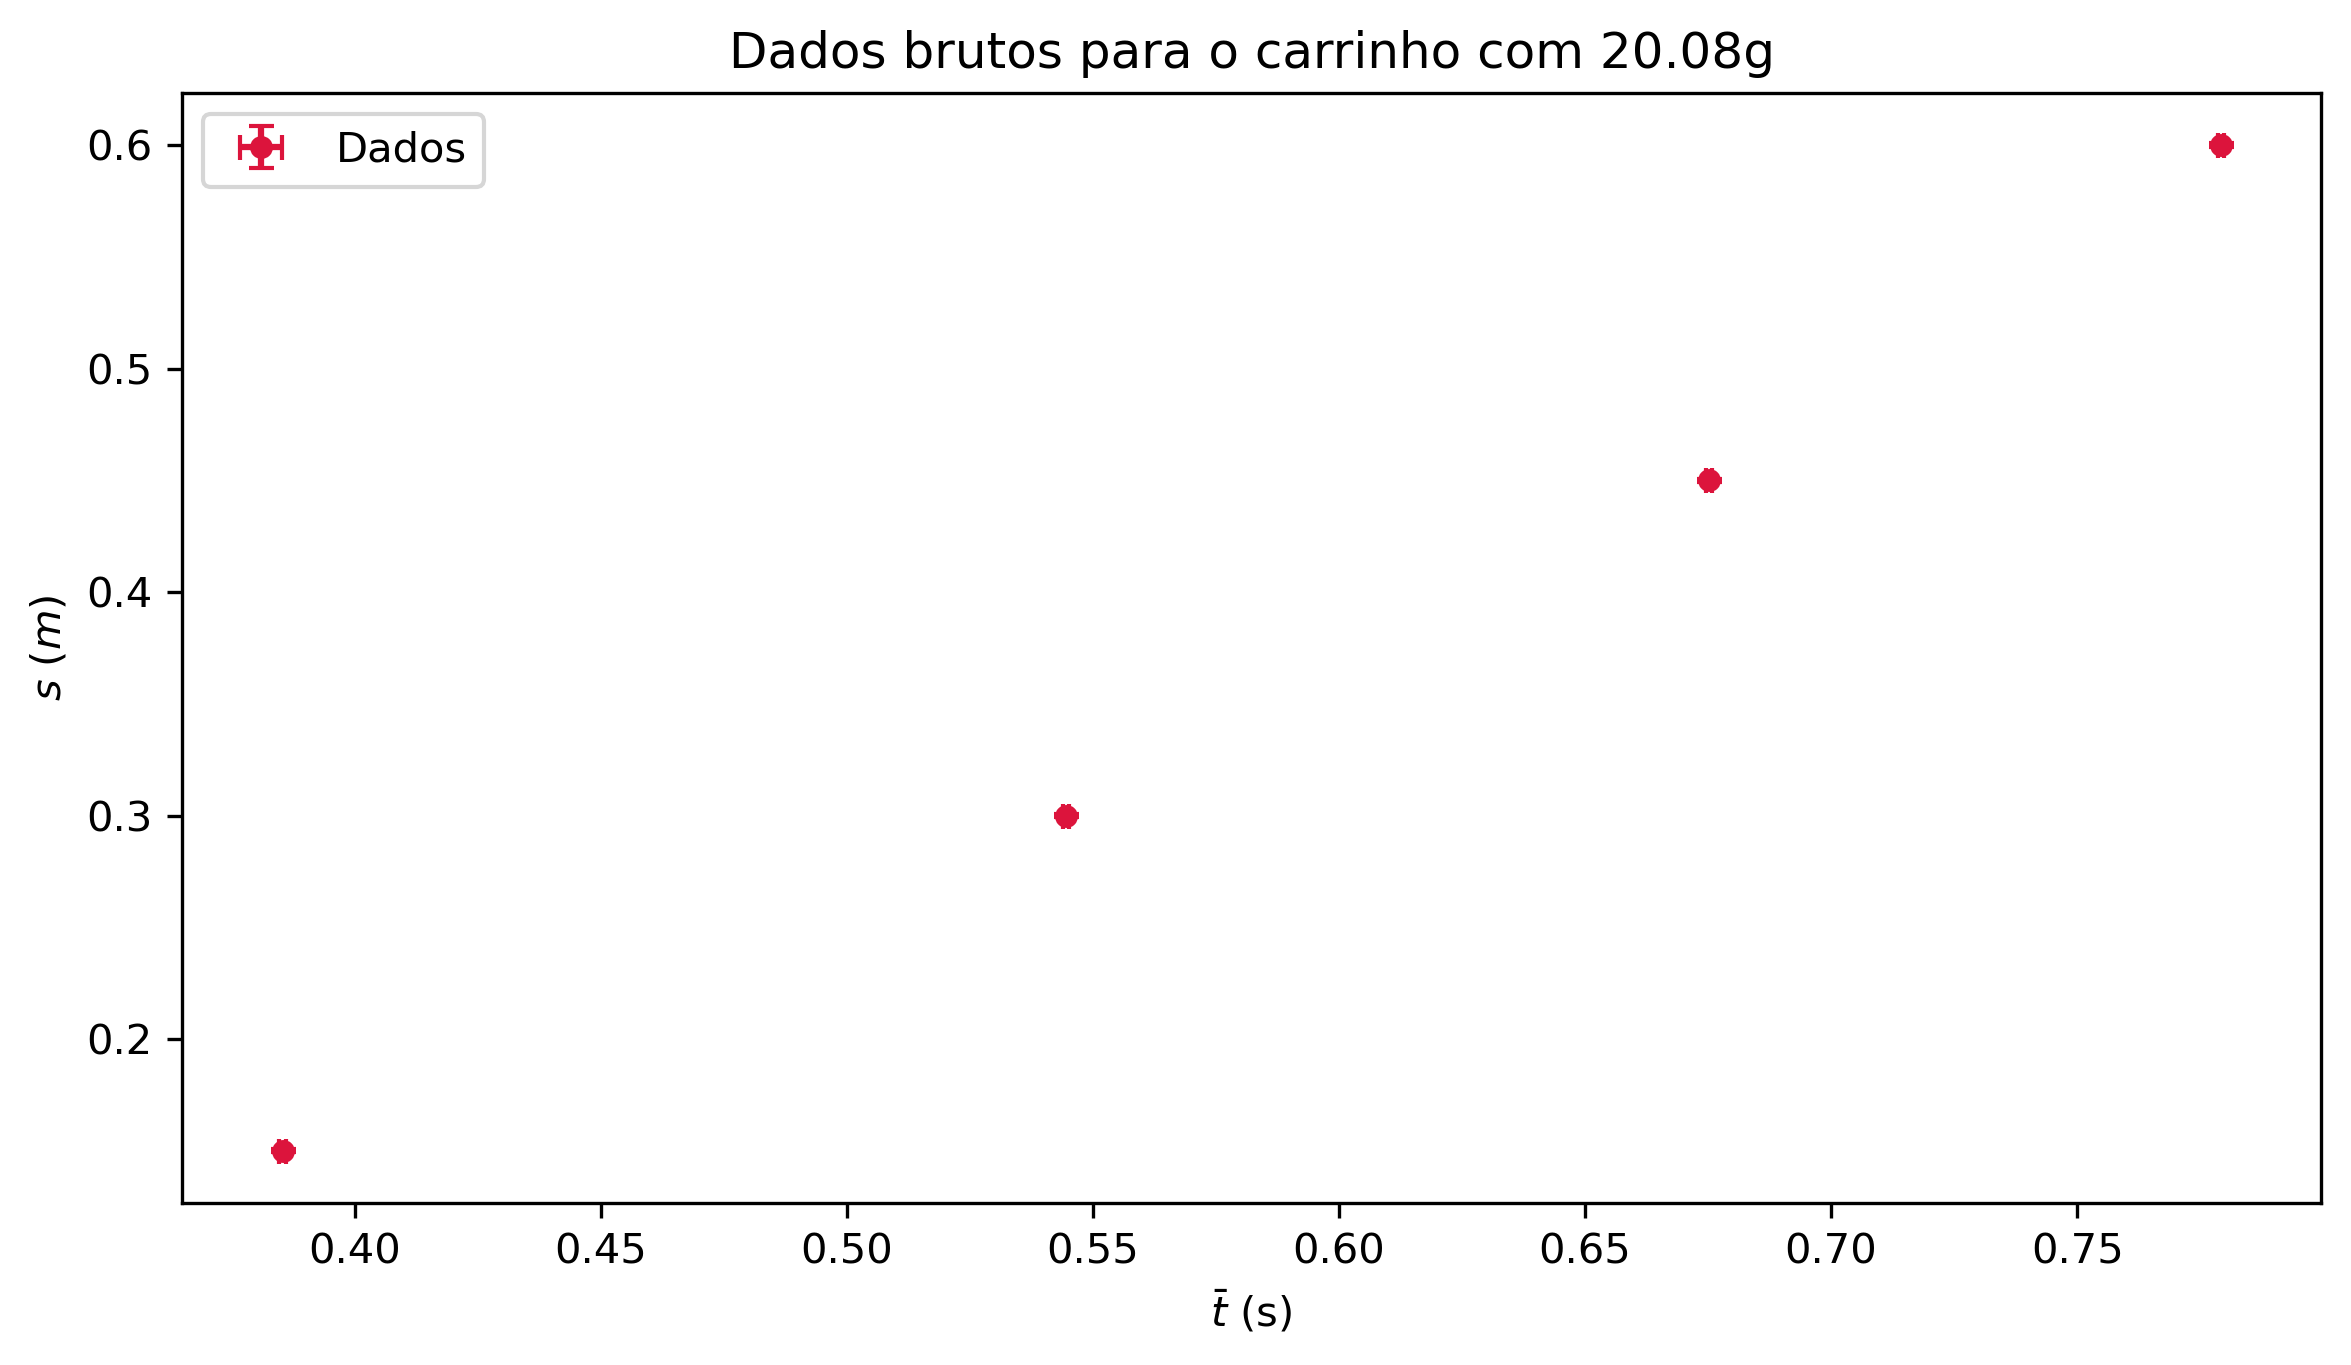

In [51]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_10_mean,s,sigma_s,sigma_10_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com 20.08g')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

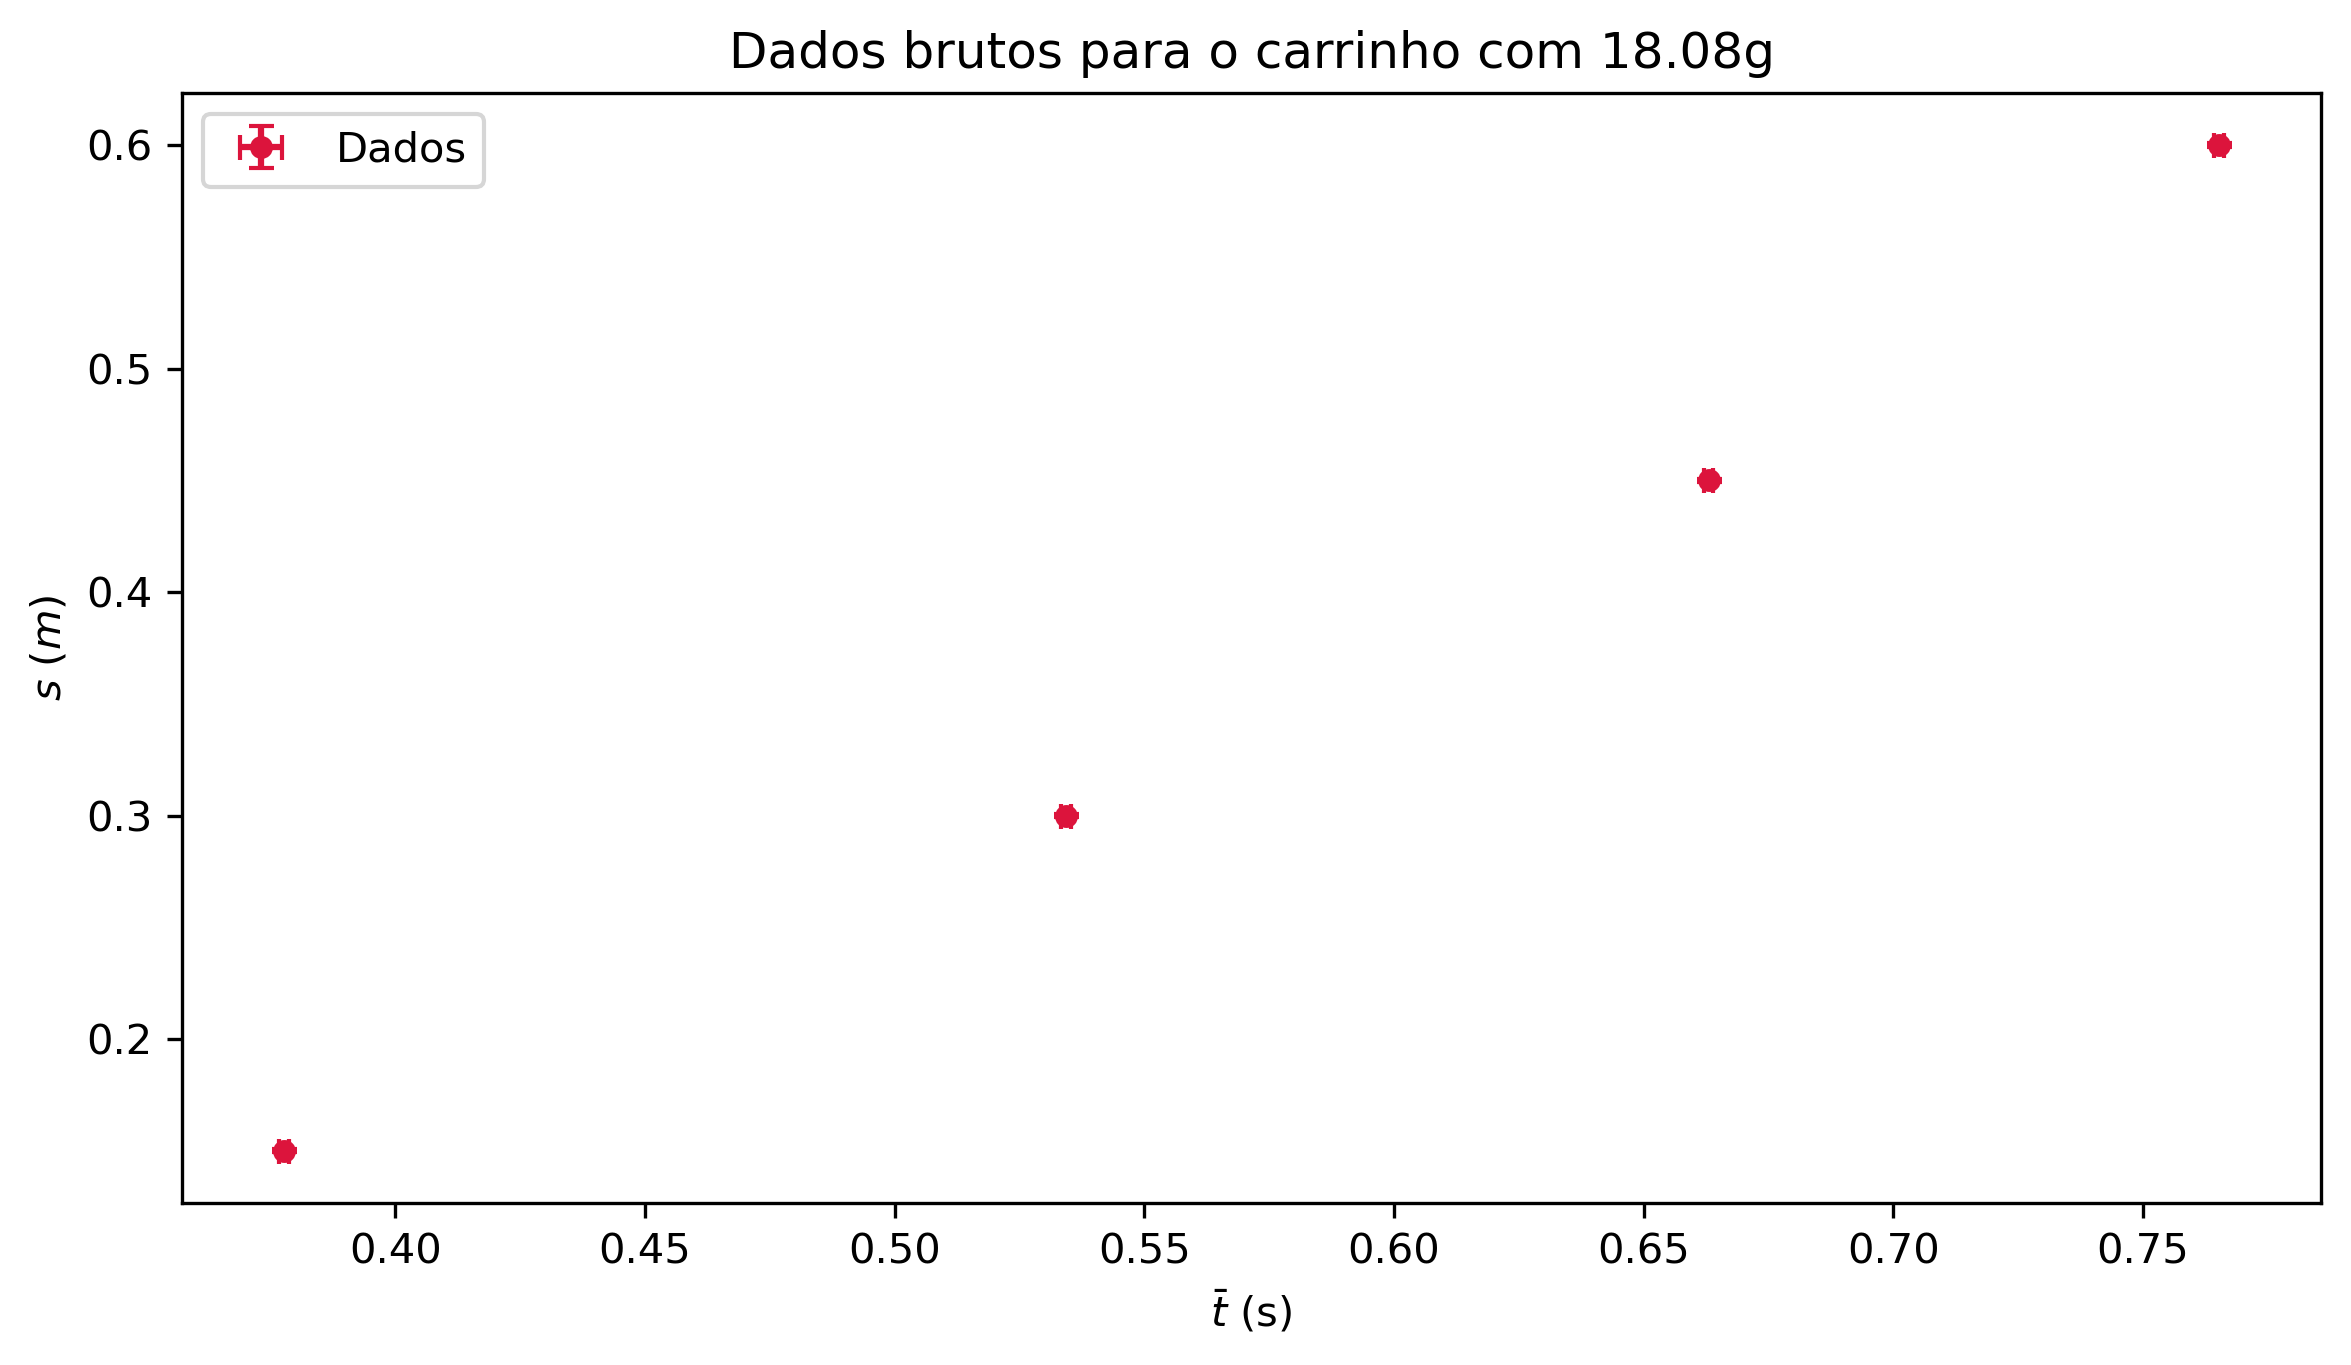

In [52]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_9_mean,s,sigma_s,sigma_9_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com 18.08g')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

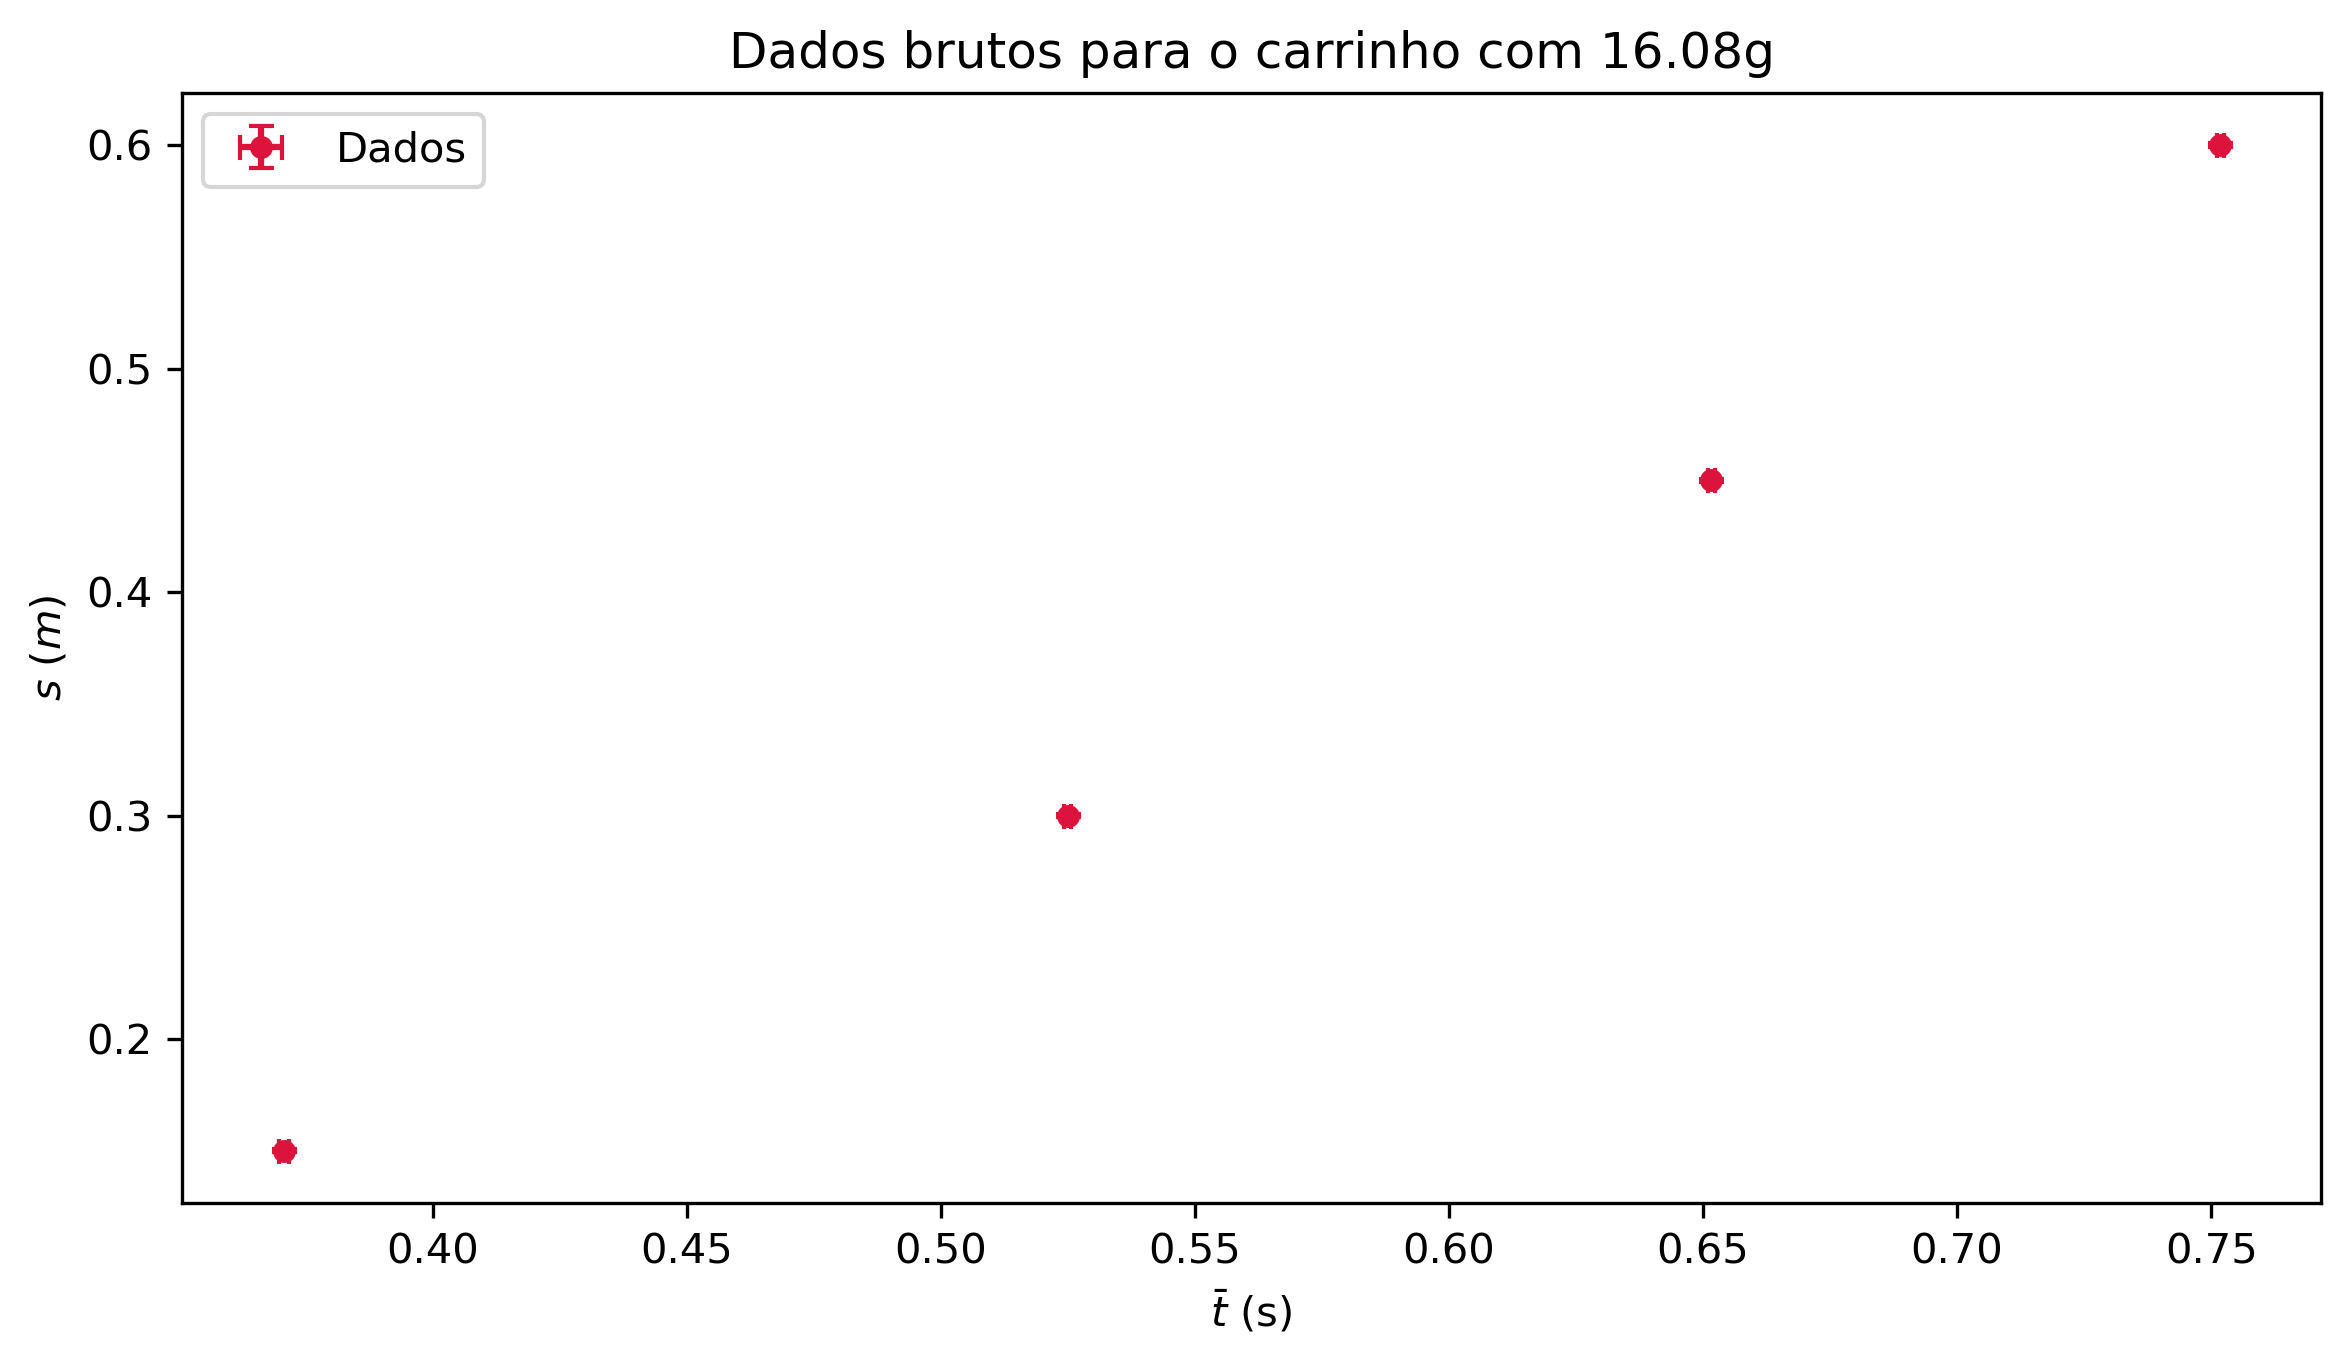

In [53]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_8_mean,s,sigma_s,sigma_8_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com 16.08g')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

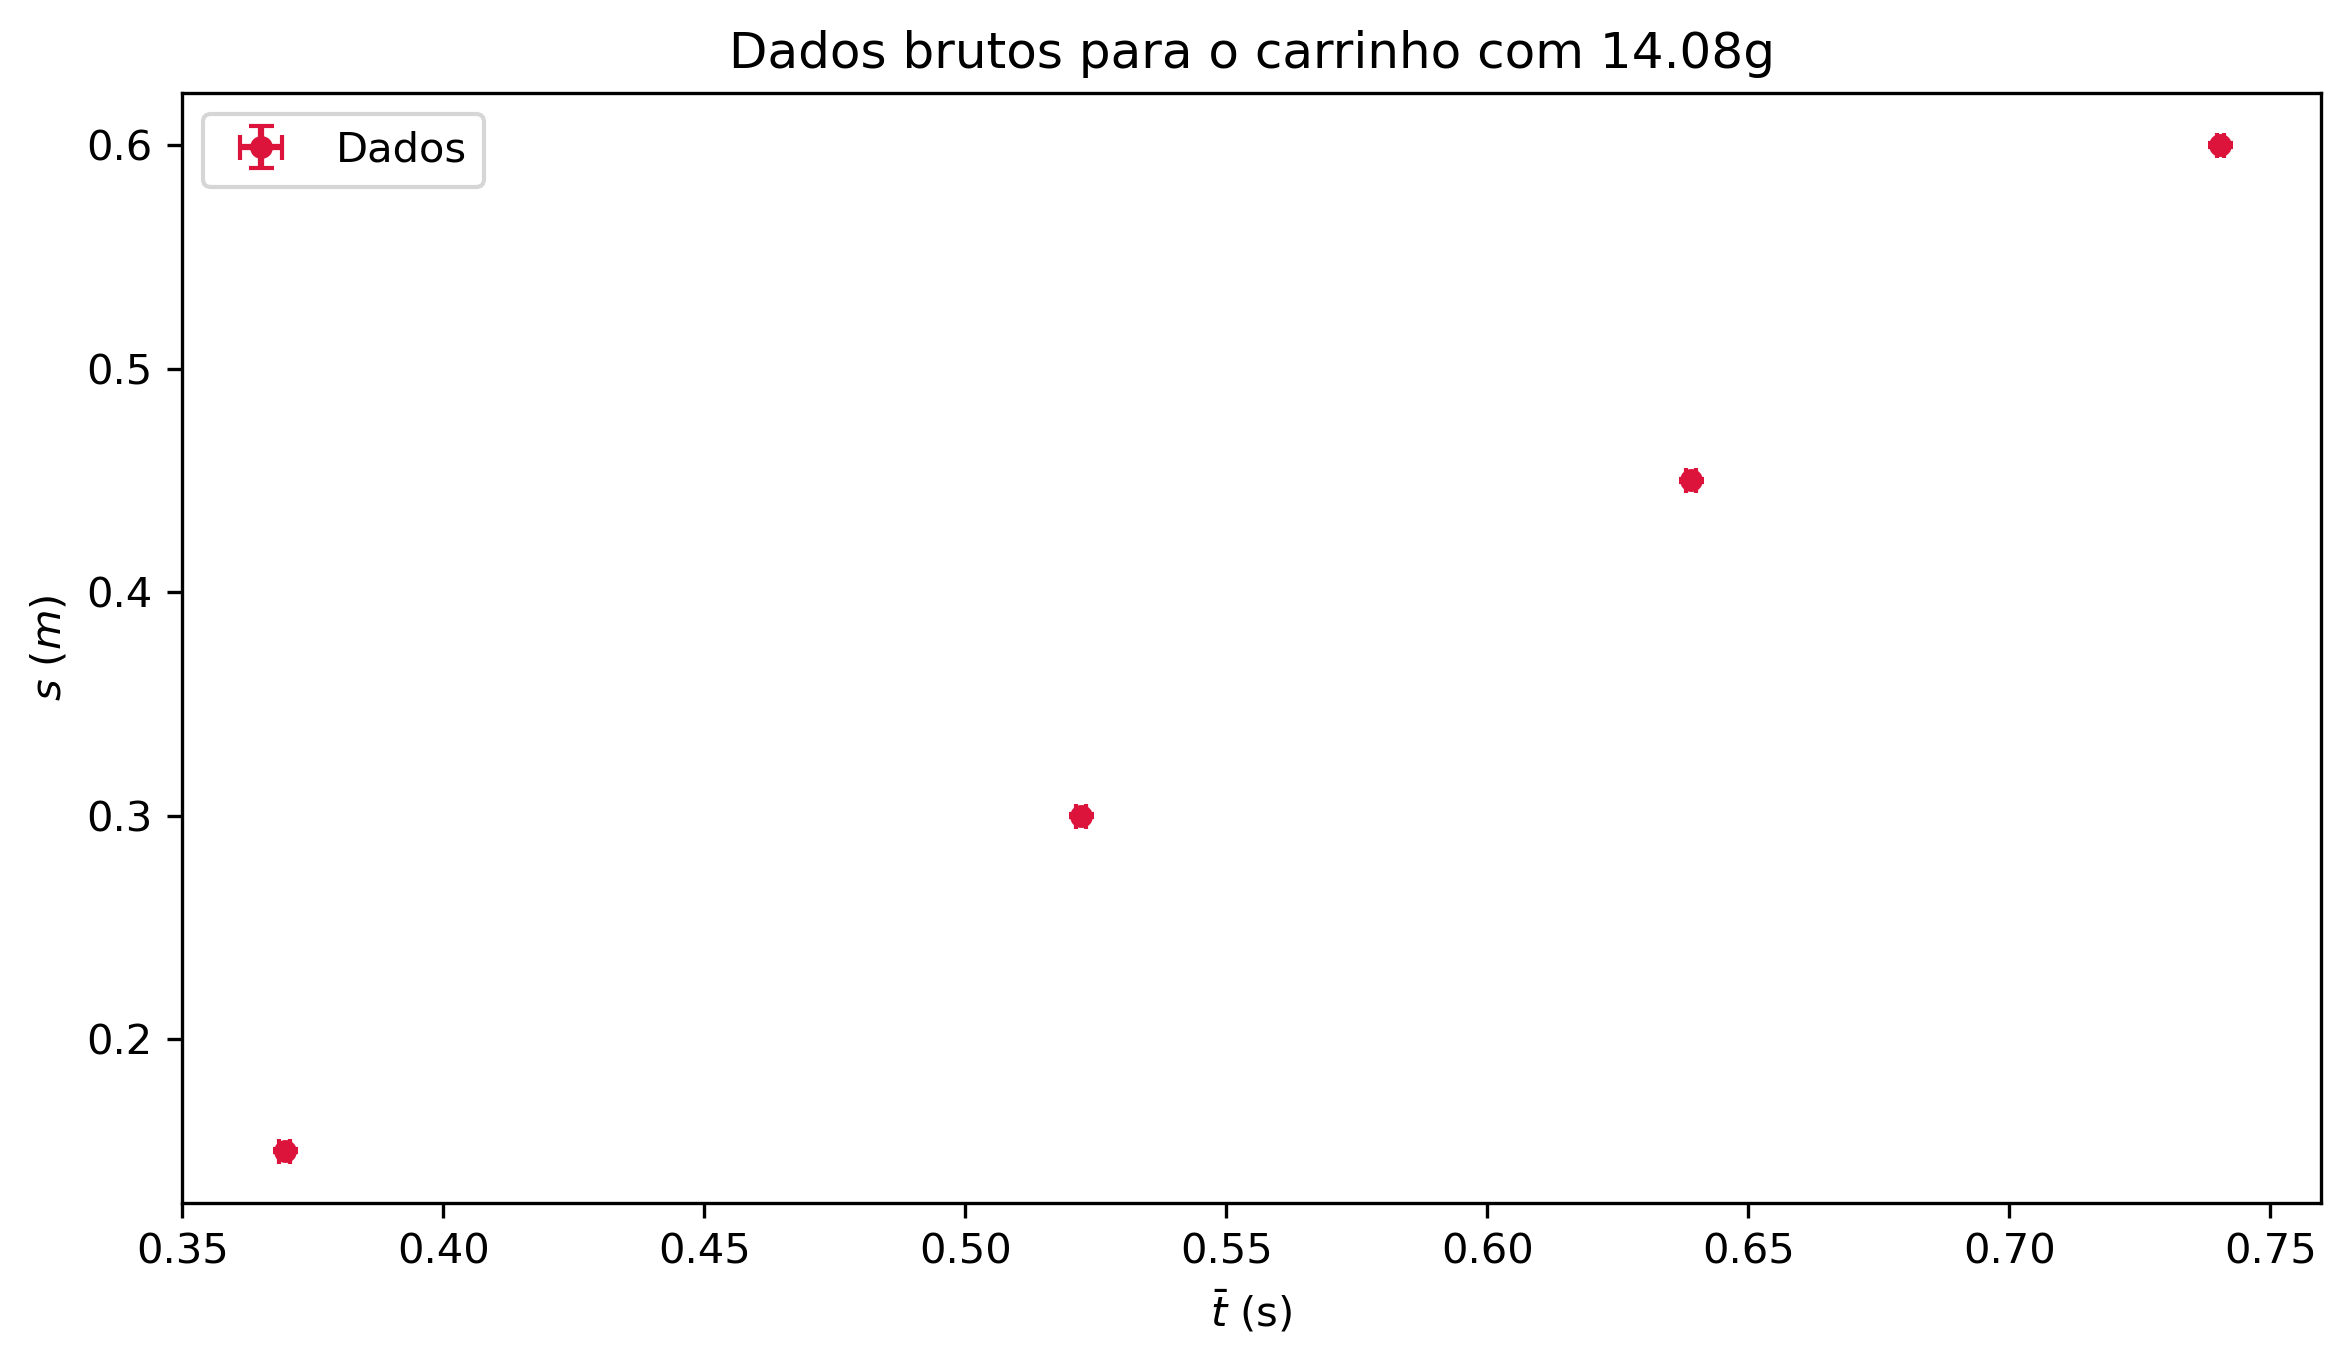

In [54]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_7_mean,s,sigma_s,sigma_7_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com 14.08g')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

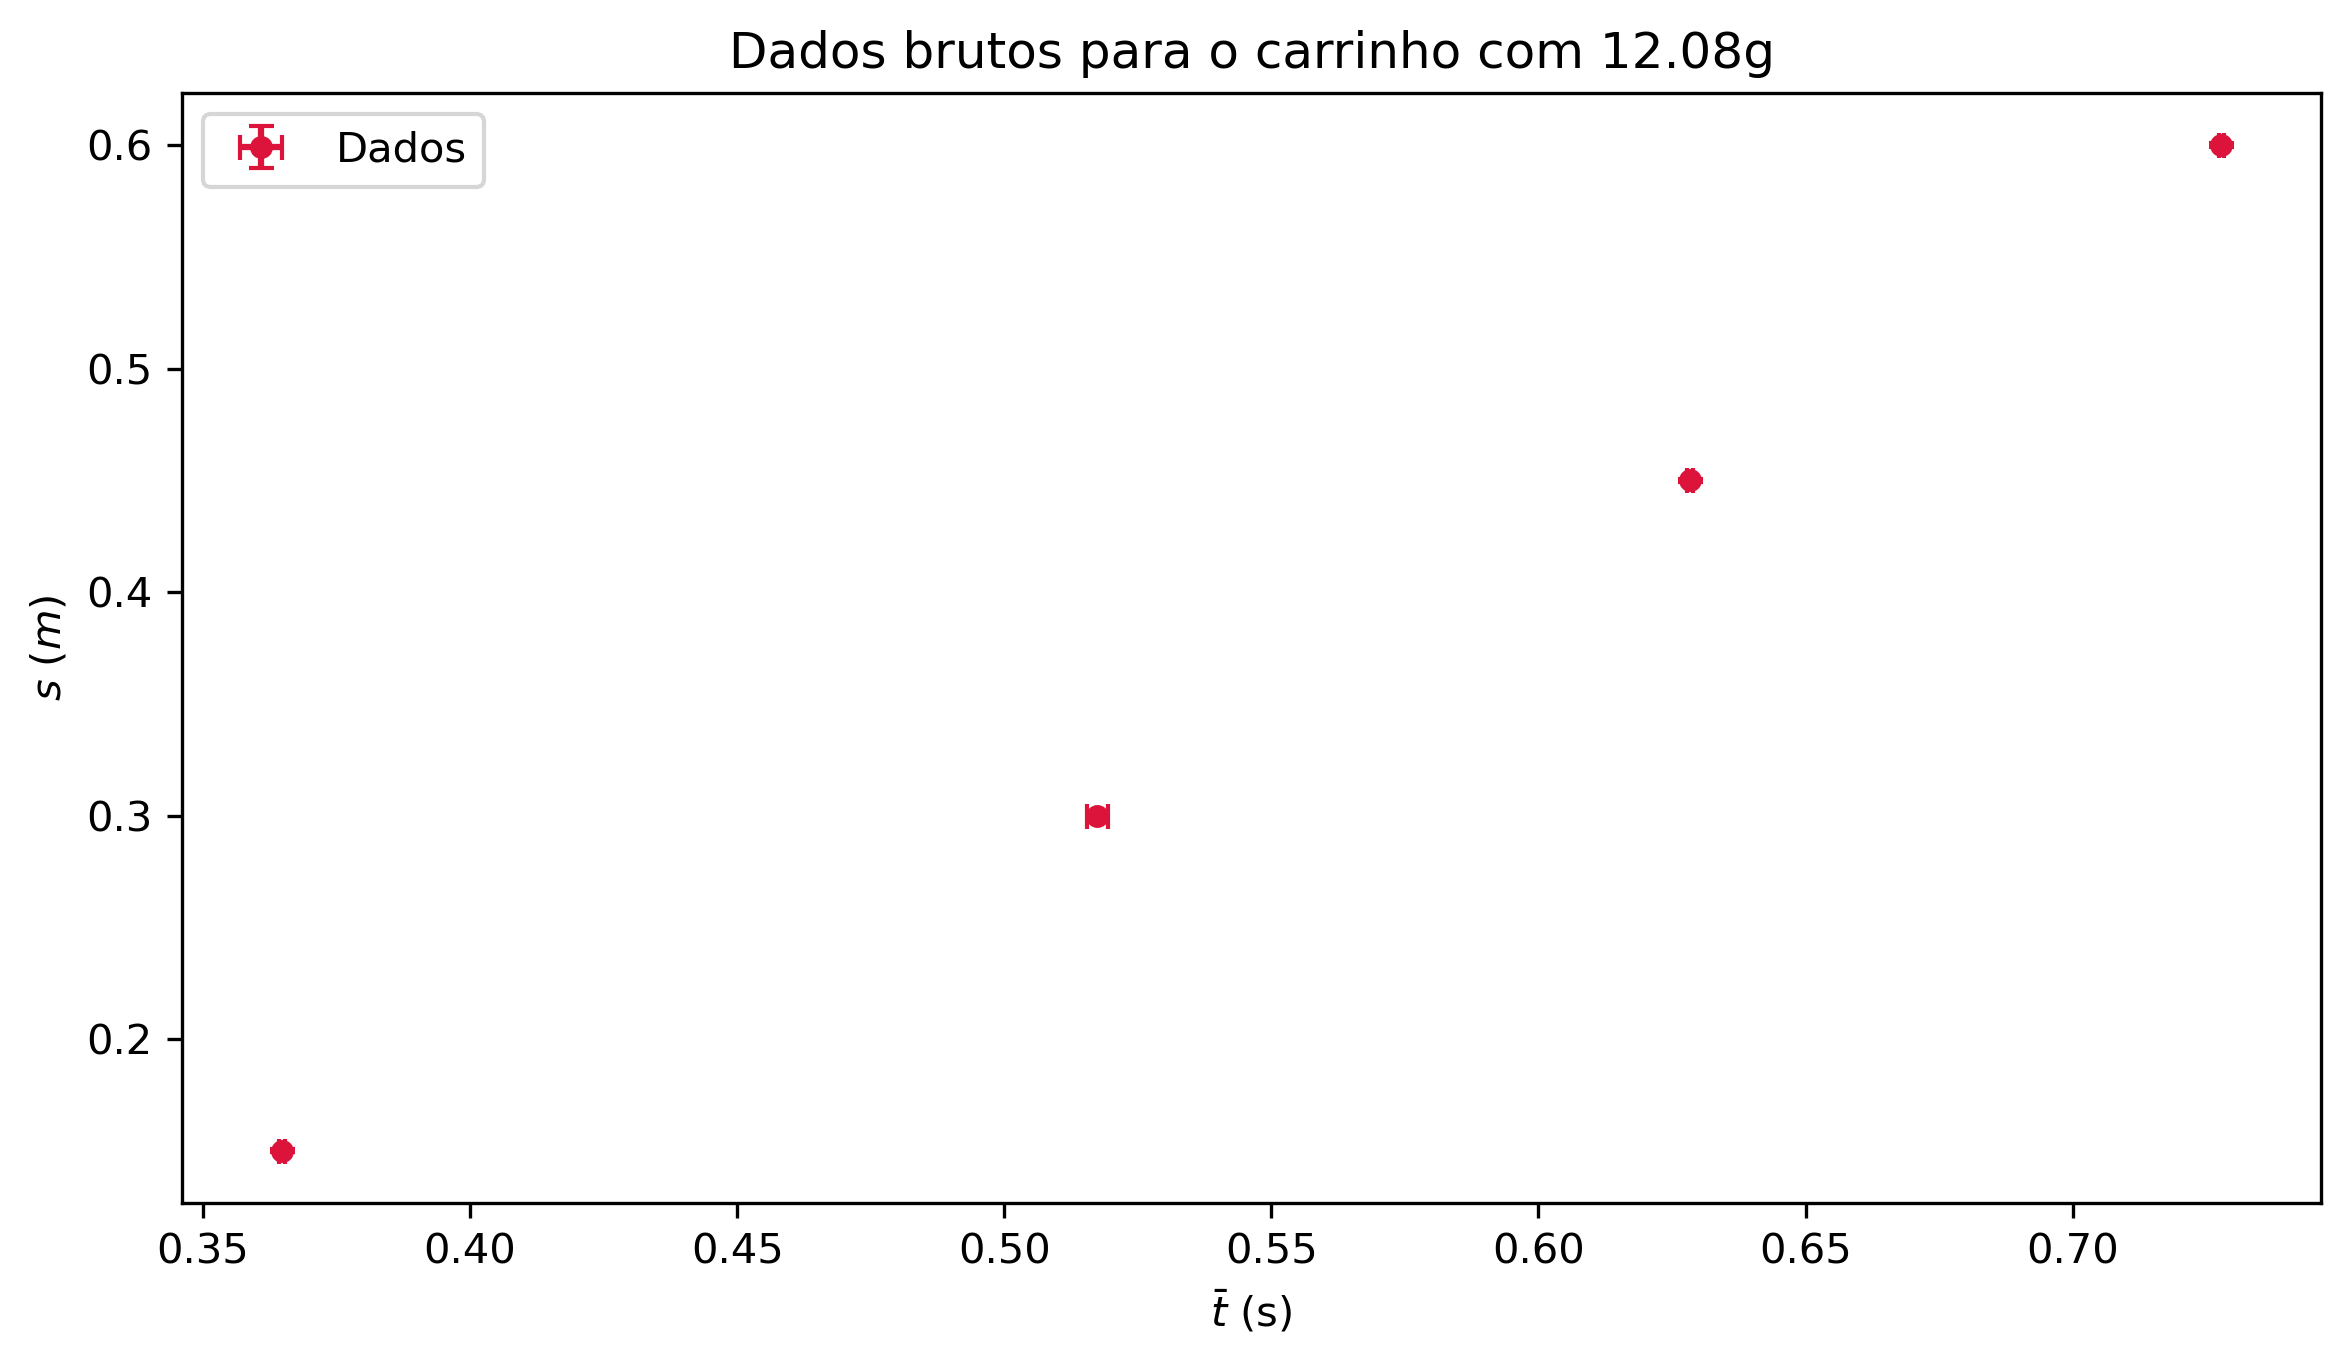

In [55]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_6_mean,s,sigma_s,sigma_6_mean, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}$ (s)')
plt.title('Dados brutos para o carrinho com 12.08g')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

# Linearização dos dados

Podemos perceber um comportamento parabólico nos dados de distância por tempo. Tendo isto em vista, a relação linear deve ocorrer entre $s$ e $\bar{t}^2$. Podemos calcular $\bar{t}^2$ a partir dos dados da tabela. Além disto, sua incerteza pode ser obtida propagando o erro de $\bar{t}$ da seguinte forma:

$$\sigma_{\bar{t}^2} = \bigg\vert \frac{d \bar{t}^2}{d\bar{t}}\bigg\vert \sigma_{\bar{t}} = 2 \bar{t} \sigma_{\bar{t}}$$

In [56]:
#10g de cada lado
t_sq_10 = t_10_mean**2

sigma_10_sq = 2*t_10_mean*sigma_10_mean
sigma_10_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_10_sq]

#9g de cada lado
t_sq_9 = t_9_mean**2

sigma_9_sq = 2*t_9_mean*sigma_9_mean
sigma_9_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_9_sq]

#8g de cada lado
t_sq_8 = t_8_mean**2

sigma_8_sq = 2*t_8_mean*sigma_8_mean
sigma_8_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_8_sq]

#7g de cada lado
t_sq_7 = t_7_mean**2

sigma_7_sq = 2*t_7_mean*sigma_7_mean
sigma_7_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_7_sq]

#6g de cada lado
t_sq_6 = t_6_mean**2

sigma_6_sq = 2*t_6_mean*sigma_6_mean
sigma_6_sq = [float('{:g}'.format(float('{:.1g}'.format(sigma)))) for sigma in sigma_6_sq]

# Gráfico dos dados linearizados

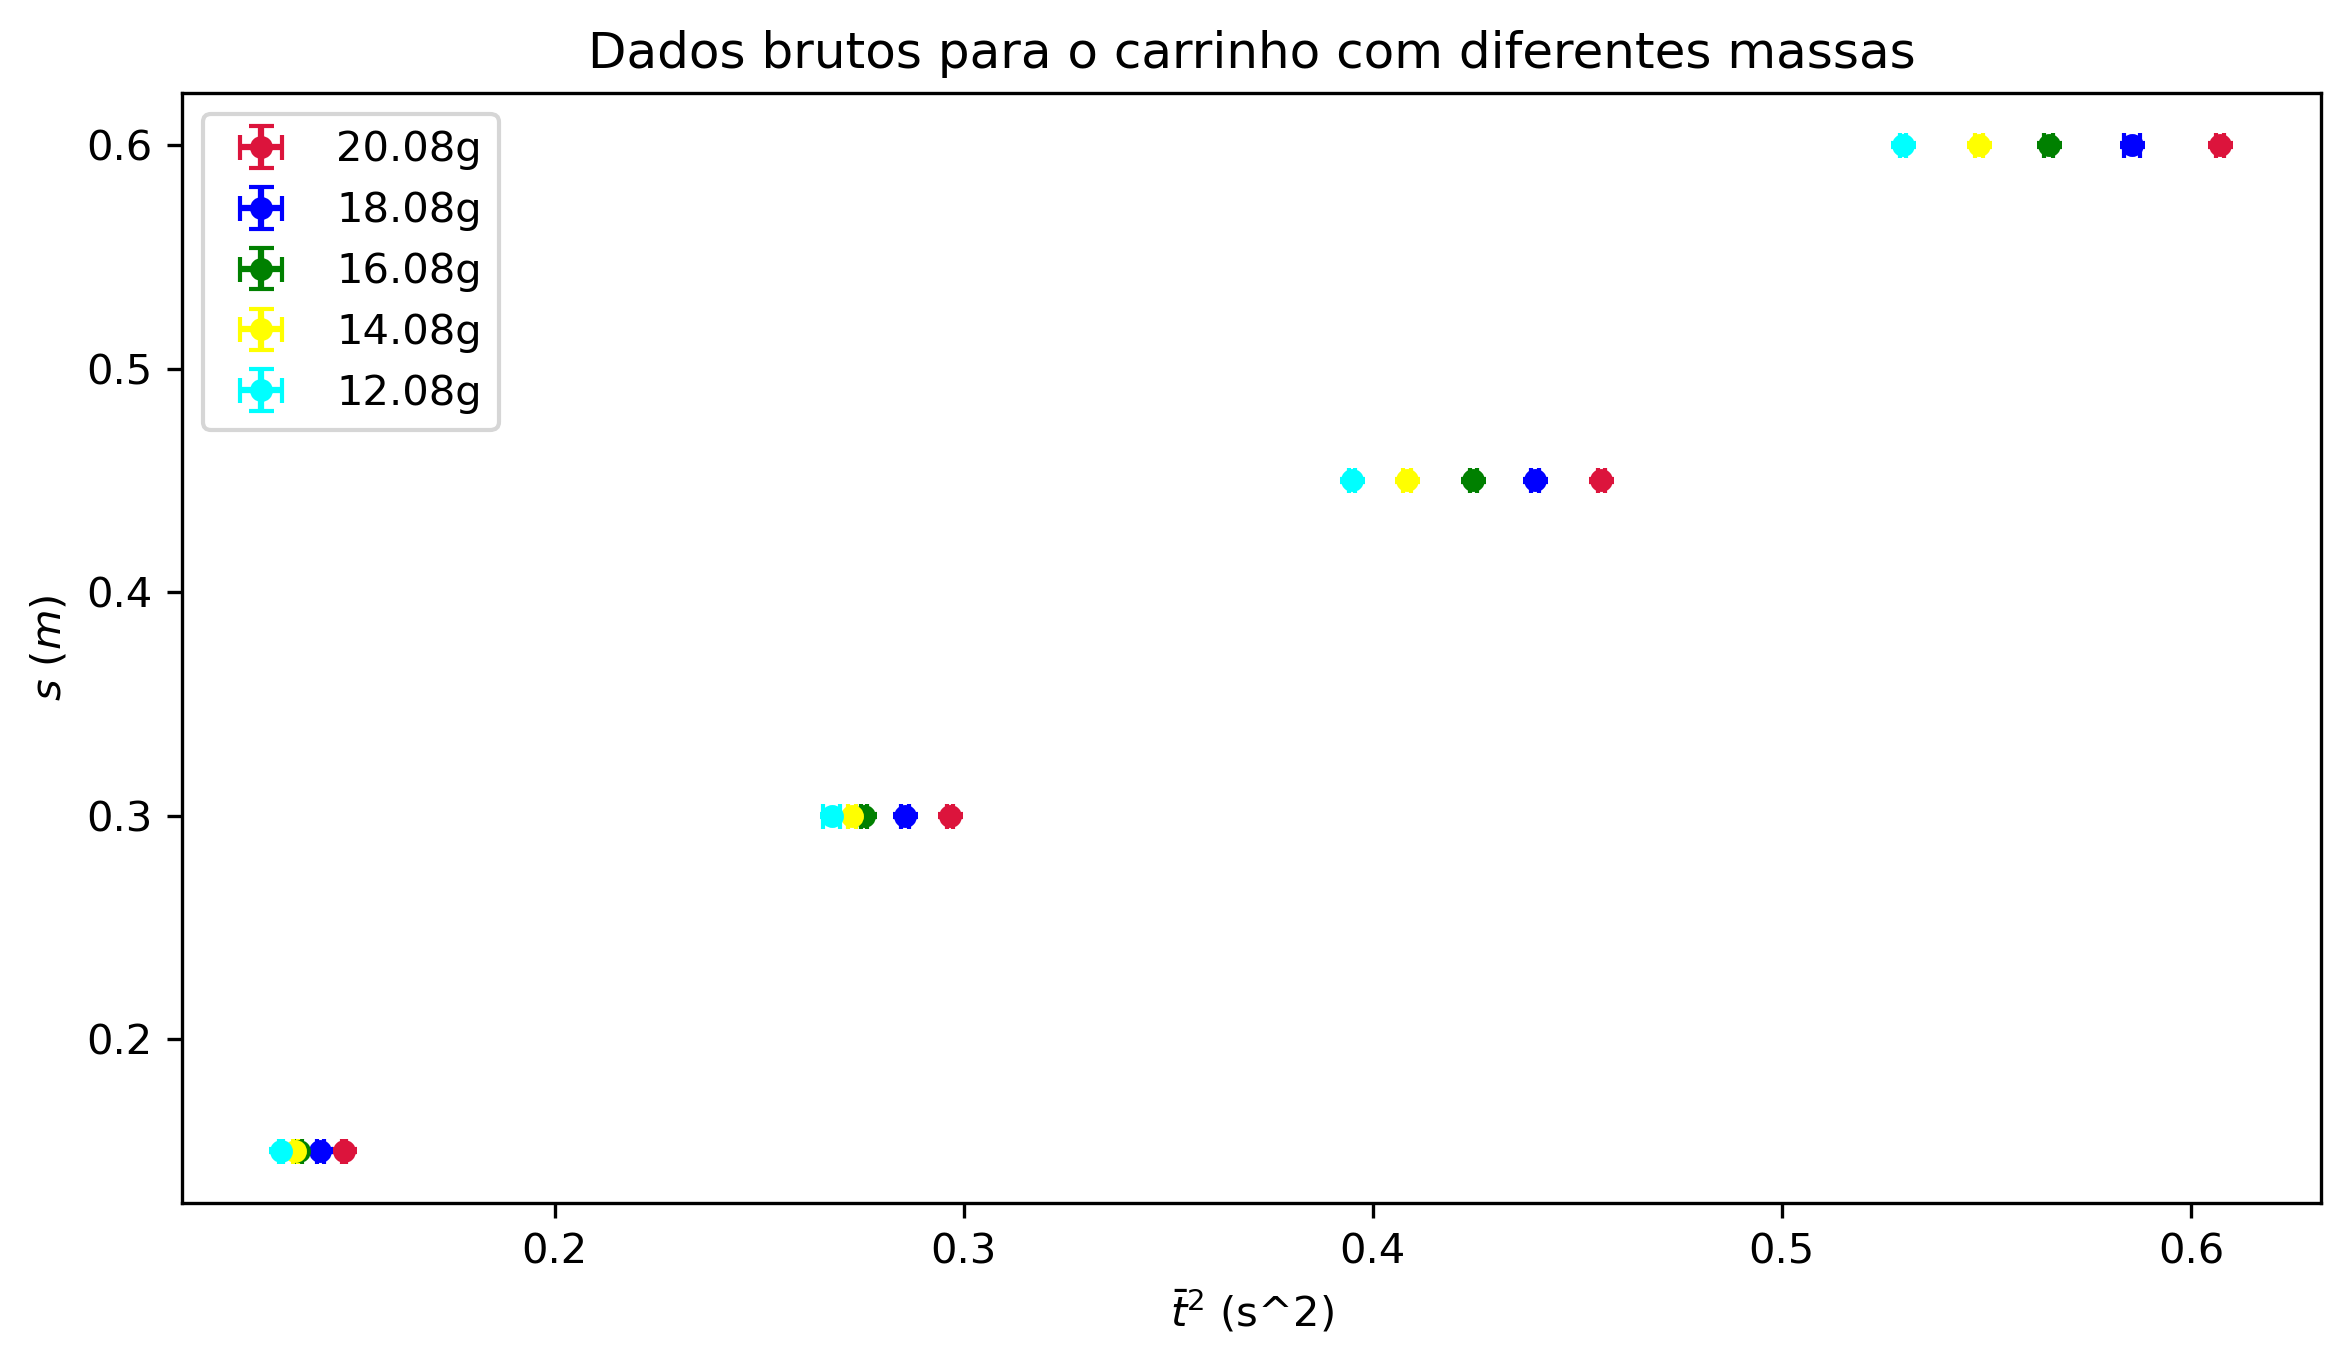

In [57]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(t_sq_10,s,sigma_s,sigma_10_sq, 'o', ms = 4.5, capsize=3, color = 'crimson', label = '20.08g')
plt.errorbar(t_sq_9,s,sigma_s,sigma_9_sq, 'o', ms = 4.5, capsize=3, color = 'blue', label = '18.08g')
plt.errorbar(t_sq_8,s,sigma_s,sigma_8_sq, 'o', ms = 4.5, capsize=3, color = 'green', label = '16.08g')
plt.errorbar(t_sq_7,s,sigma_s,sigma_7_sq, 'o', ms = 4.5, capsize=3, color = 'yellow', label = '14.08g')
plt.errorbar(t_sq_6,s,sigma_s,sigma_6_sq, 'o', ms = 4.5, capsize=3, color = 'cyan', label = '12.08g')
plt.ylabel(r'$s$ ($m$)')
plt.xlabel(r'$\bar{t}^2$ (s^2)')
plt.title('Dados brutos para o carrinho com diferentes massas')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()

# Ajuste linear para os dados do carrinho com 10g de cada lado

In [58]:
fitpars_10, cov_pars_10 = np.polyfit(t_sq_10,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_10 = fitpars_10[0]
coef_linear_10 = fitpars_10[1]
sigma_angular_10 = np.sqrt(cov_pars_10[0][0])
sigma_linear_10 = np.sqrt(cov_pars_10[1][1])

sigma_angular_10 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_10))))
sigma_linear_10 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_10))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s^2)' % (coef_angular_10 ,sigma_angular_10))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_10,sigma_linear_10))

Coeficiente angular: 0.977 +- 0.009 (m/s^2)
Coeficiente linear: 0.007 +- 0.004 (m)


chi^2_red = 20.633


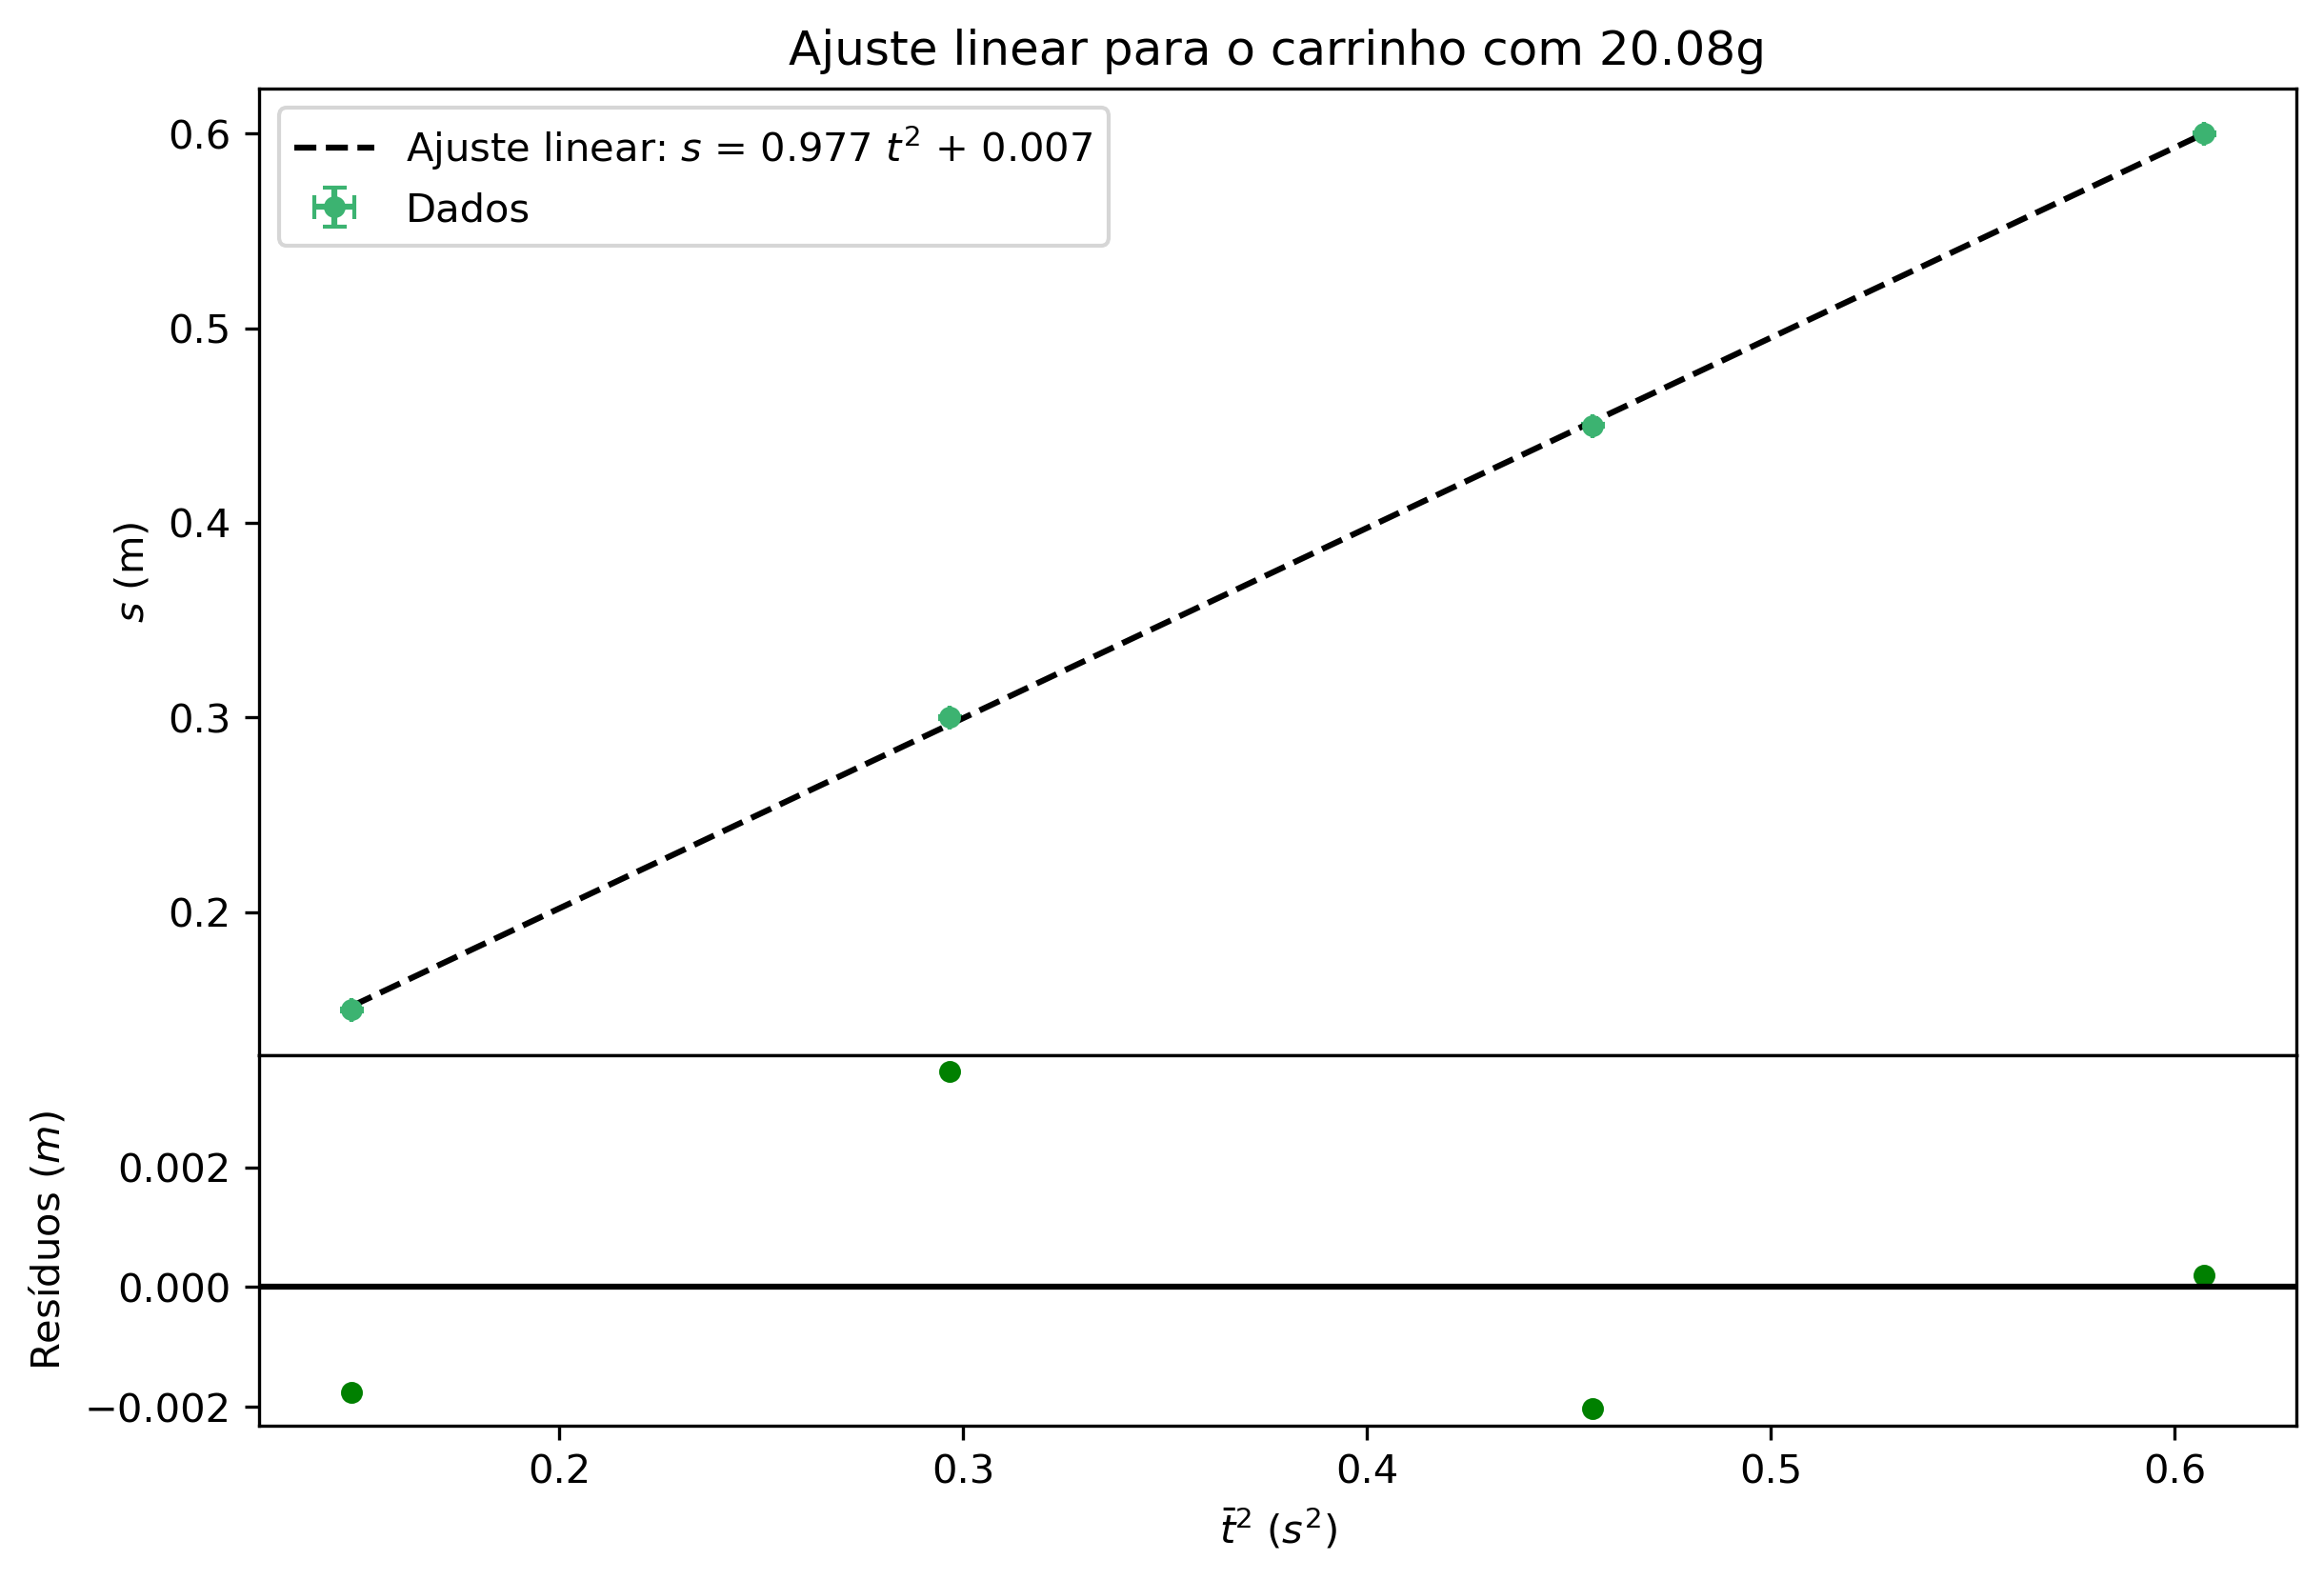

In [59]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_10, t_sq_10)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_10,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(t_sq_10,t_sq_10*coef_angular_10 + coef_linear_10, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.3f $t^2$ + %.3f' % (coef_angular_10,abs(coef_linear_10)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 20.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_10, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 9g de cada lado

In [60]:
fitpars_9, cov_pars_9 = np.polyfit(t_sq_9,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_9 = fitpars_9[0]
coef_linear_9 = fitpars_9[1]
sigma_angular_9 = np.sqrt(cov_pars_9[0][0])
sigma_linear_9 = np.sqrt(cov_pars_9[1][1])

sigma_angular_9 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_9))))
sigma_linear_9 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_9))))

                     
print('Coeficiente angular: %.2f +- %.2f (m/s^2)' % (coef_angular_9 ,sigma_angular_9))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_9,sigma_linear_9))

Coeficiente angular: 1.01 +- 0.01 (m/s^2)
Coeficiente linear: 0.007 +- 0.004 (m)


chi^2_red = 21.700


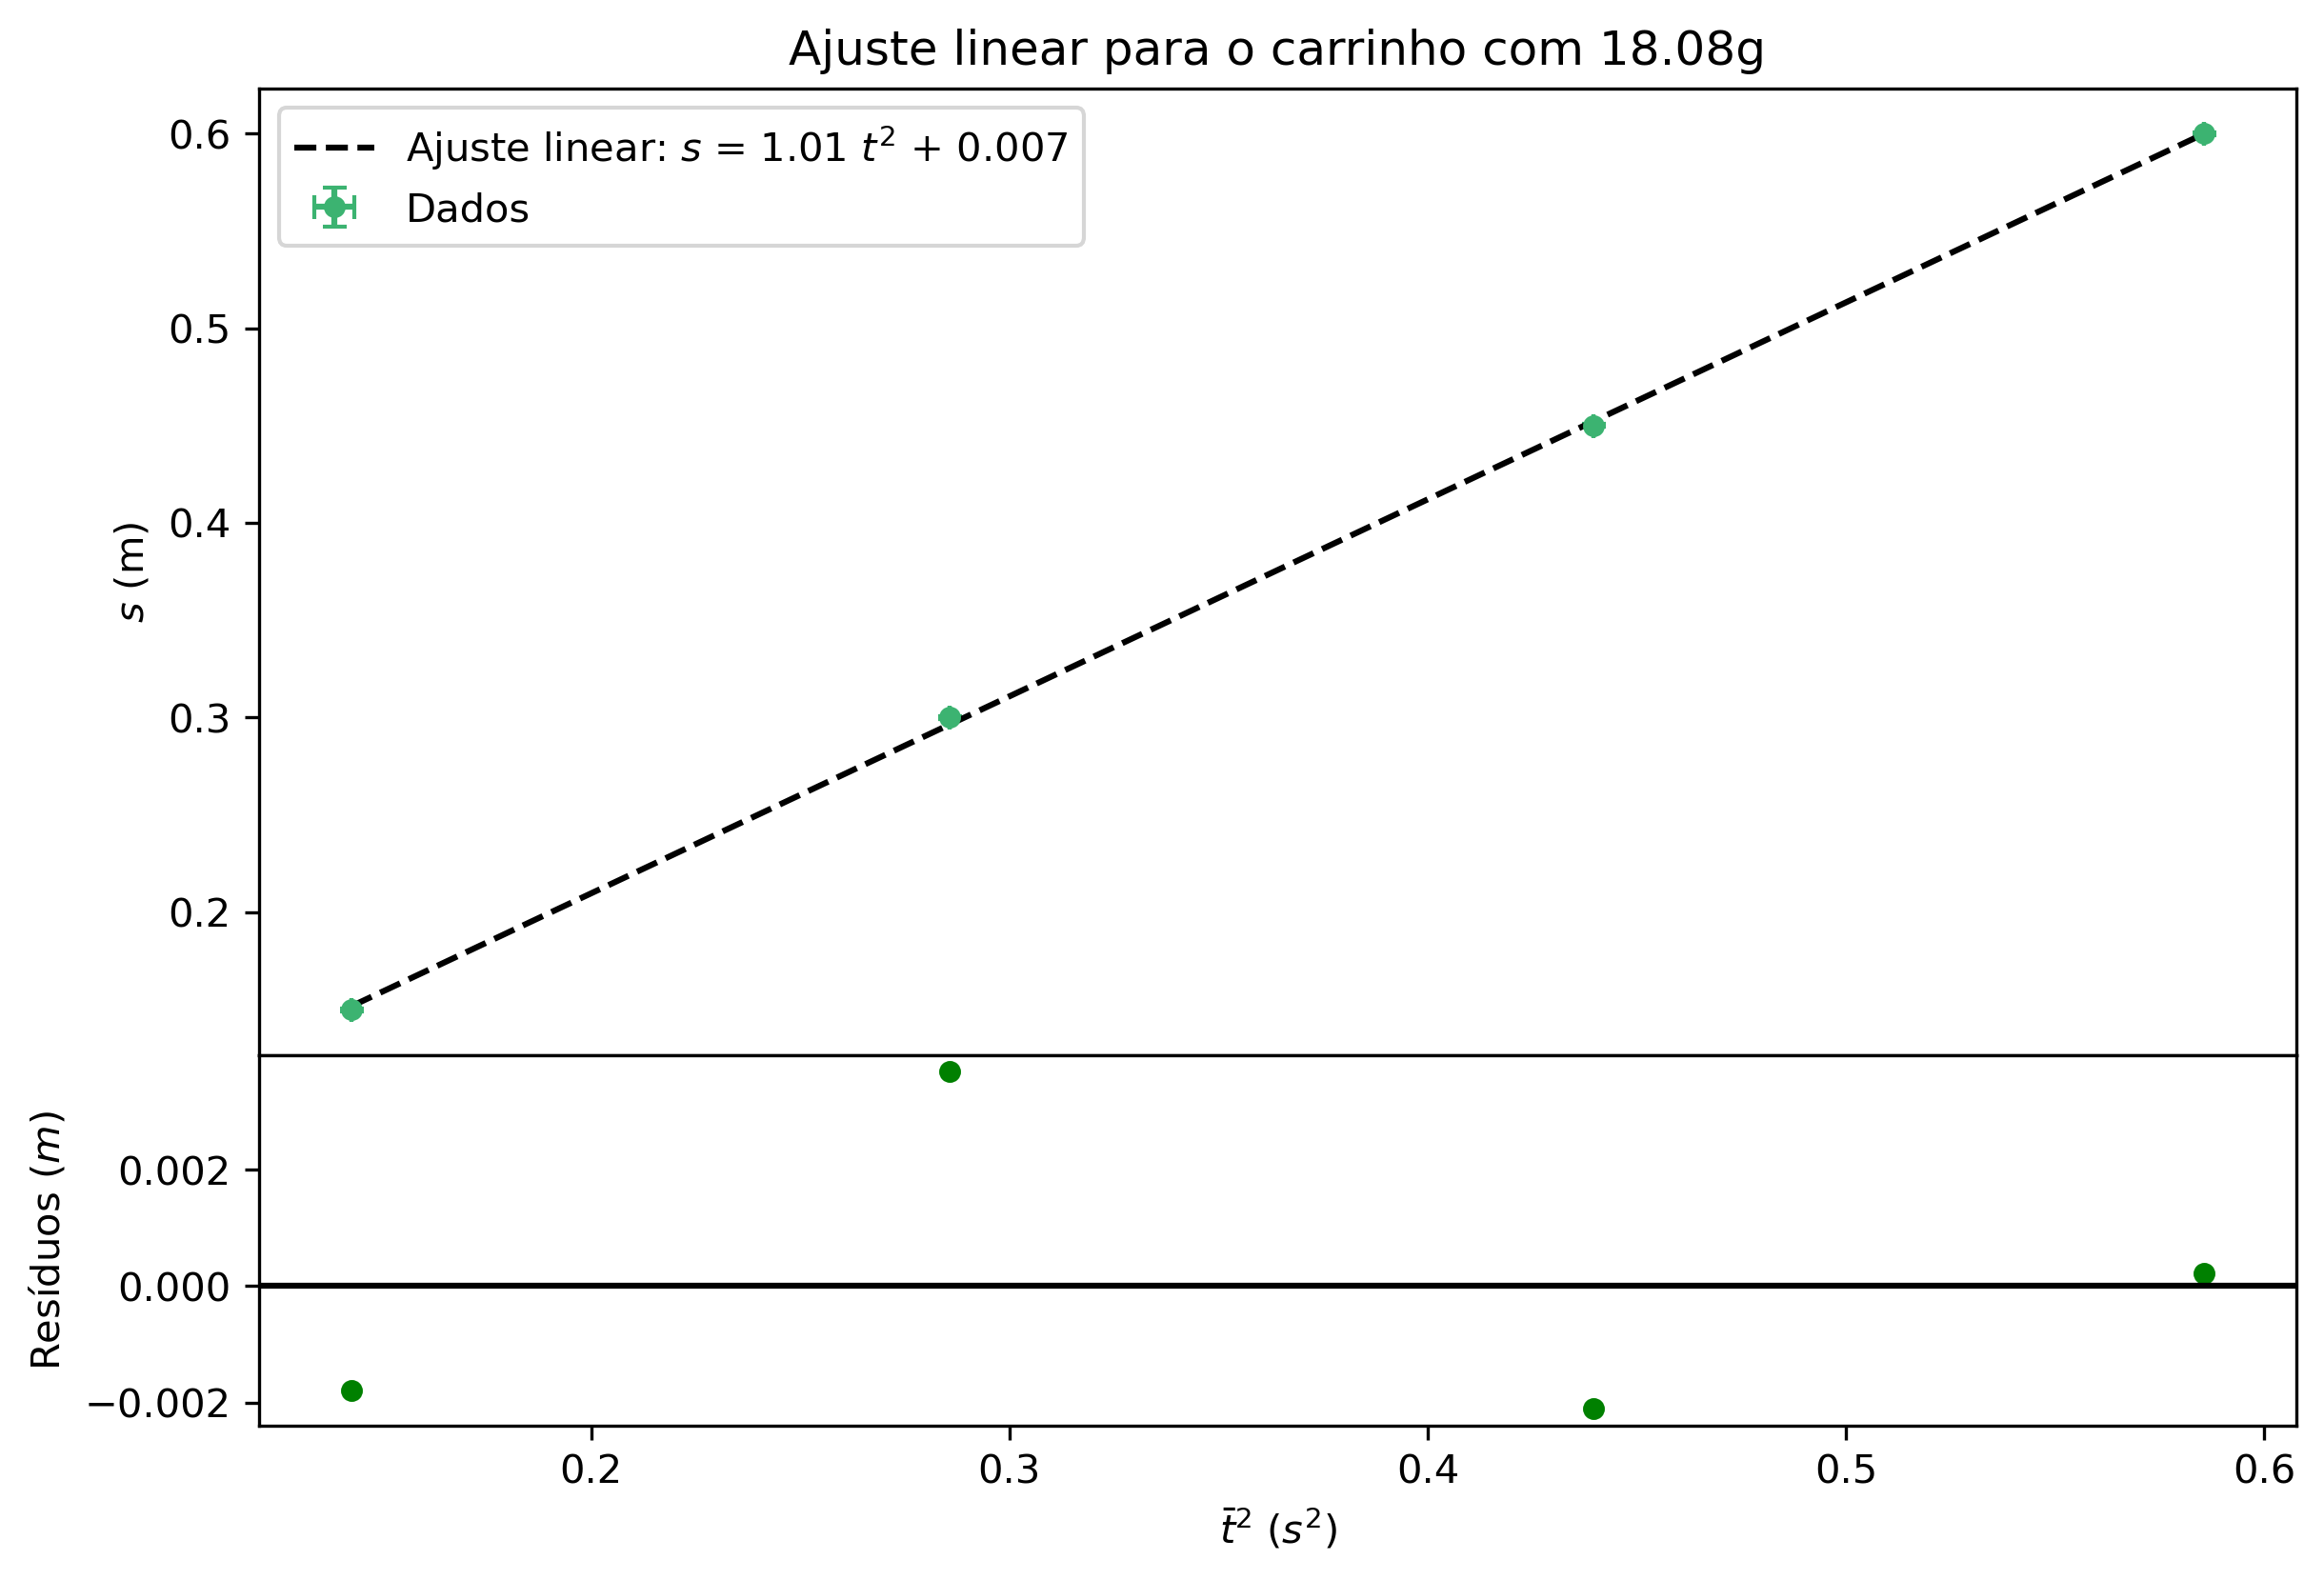

In [61]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_9, t_sq_9)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_9,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(t_sq_9,t_sq_9*coef_angular_9 + coef_linear_9, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.2f $t^2$ + %.3f' % (coef_angular_9,abs(coef_linear_9)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 18.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 8g de cada lado

In [62]:
fitpars_8, cov_pars_8 = np.polyfit(t_sq_8,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_8 = fitpars_8[0]
coef_linear_8 = fitpars_8[1]
sigma_angular_8 = np.sqrt(cov_pars_8[0][0])
sigma_linear_8 = np.sqrt(cov_pars_8[1][1])

sigma_angular_8 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_8))))
sigma_linear_8 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_8))))

                     
print('Coeficiente angular: %.2f +- %.2f (m/s^2)' % (coef_angular_8 ,sigma_angular_8))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_8,sigma_linear_8))

Coeficiente angular: 1.05 +- 0.01 (m/s^2)
Coeficiente linear: 0.008 +- 0.004 (m)


chi^2_red = 22.281


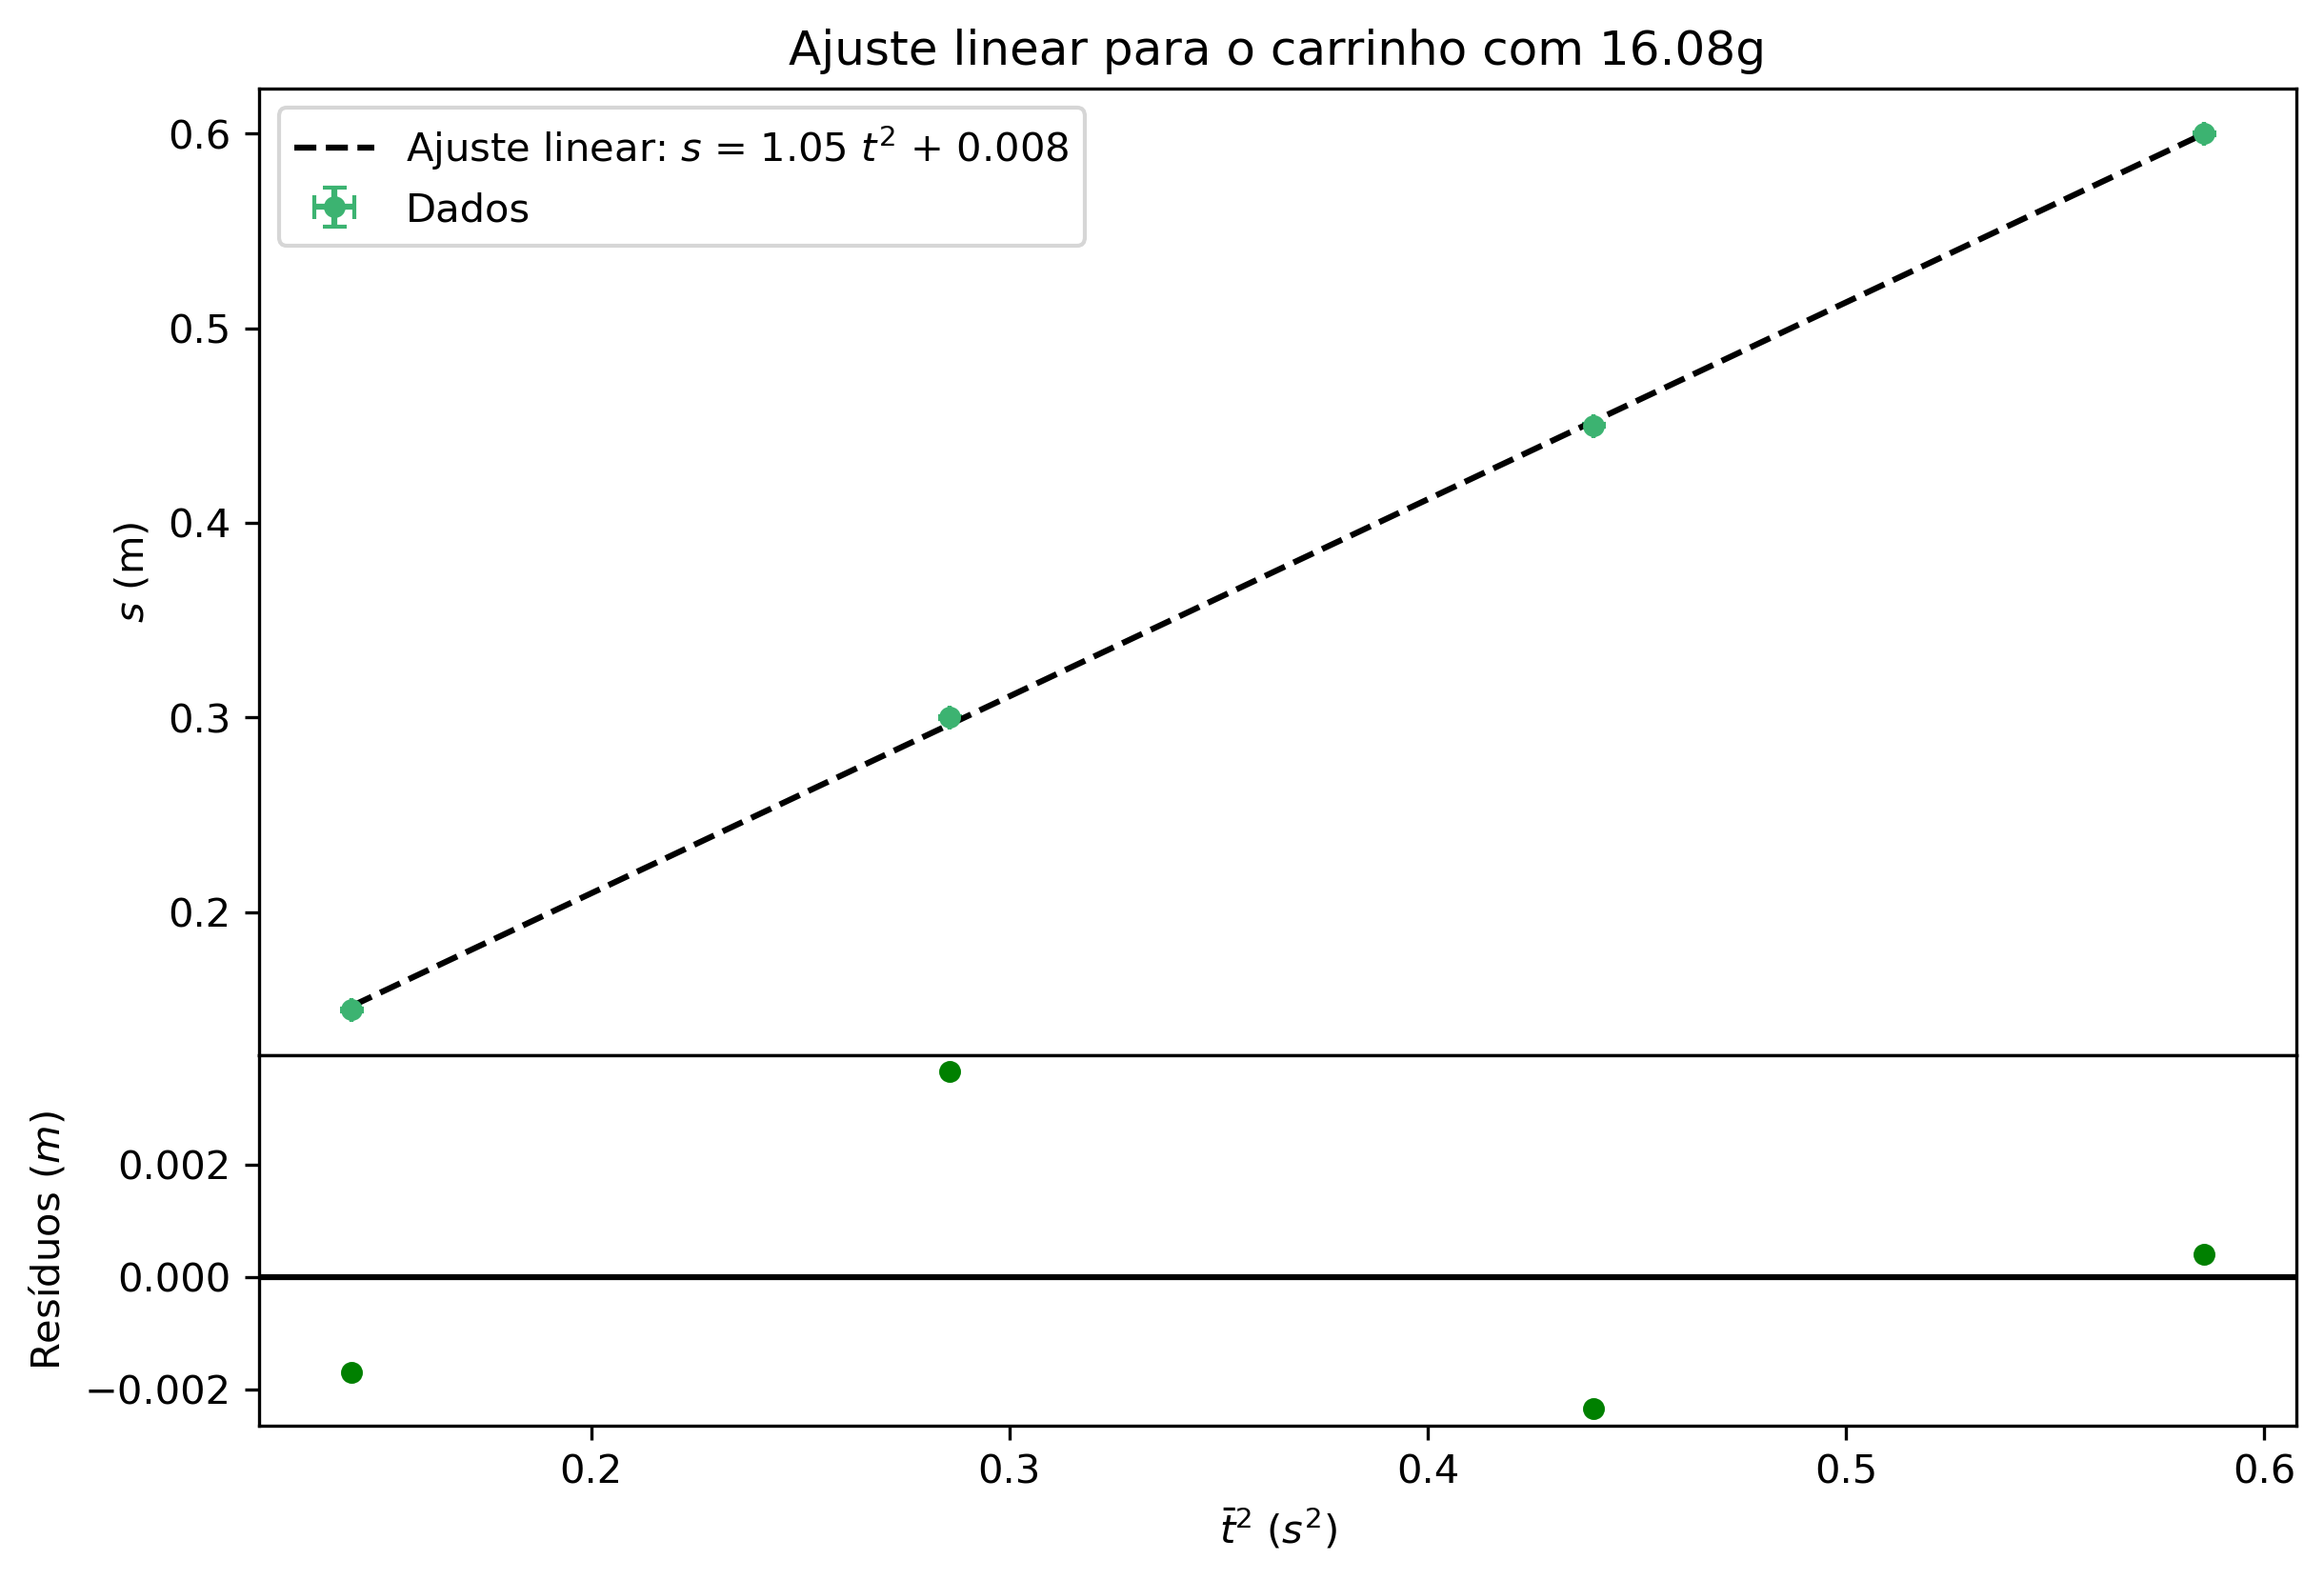

In [63]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_8, t_sq_8)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_9,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(t_sq_9,t_sq_9*coef_angular_9 + coef_linear_9, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.2f $t^2$ + %.3f' % (coef_angular_8,abs(coef_linear_8)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 16.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 7g de cada lado

In [64]:
fitpars_7, cov_pars_7 = np.polyfit(t_sq_7,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_7 = fitpars_7[0]
coef_linear_7 = fitpars_7[1]
sigma_angular_7 = np.sqrt(cov_pars_7[0][0])
sigma_linear_7 = np.sqrt(cov_pars_7[1][1])

sigma_angular_7 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_7))))
sigma_linear_7 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_7))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s^2)' % (coef_angular_7 ,sigma_angular_7))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_7,sigma_linear_7))

Coeficiente angular: 1.095 +- 0.005 (m/s^2)
Coeficiente linear: 0.001 +- 0.002 (m)


chi^2_red = 5.725


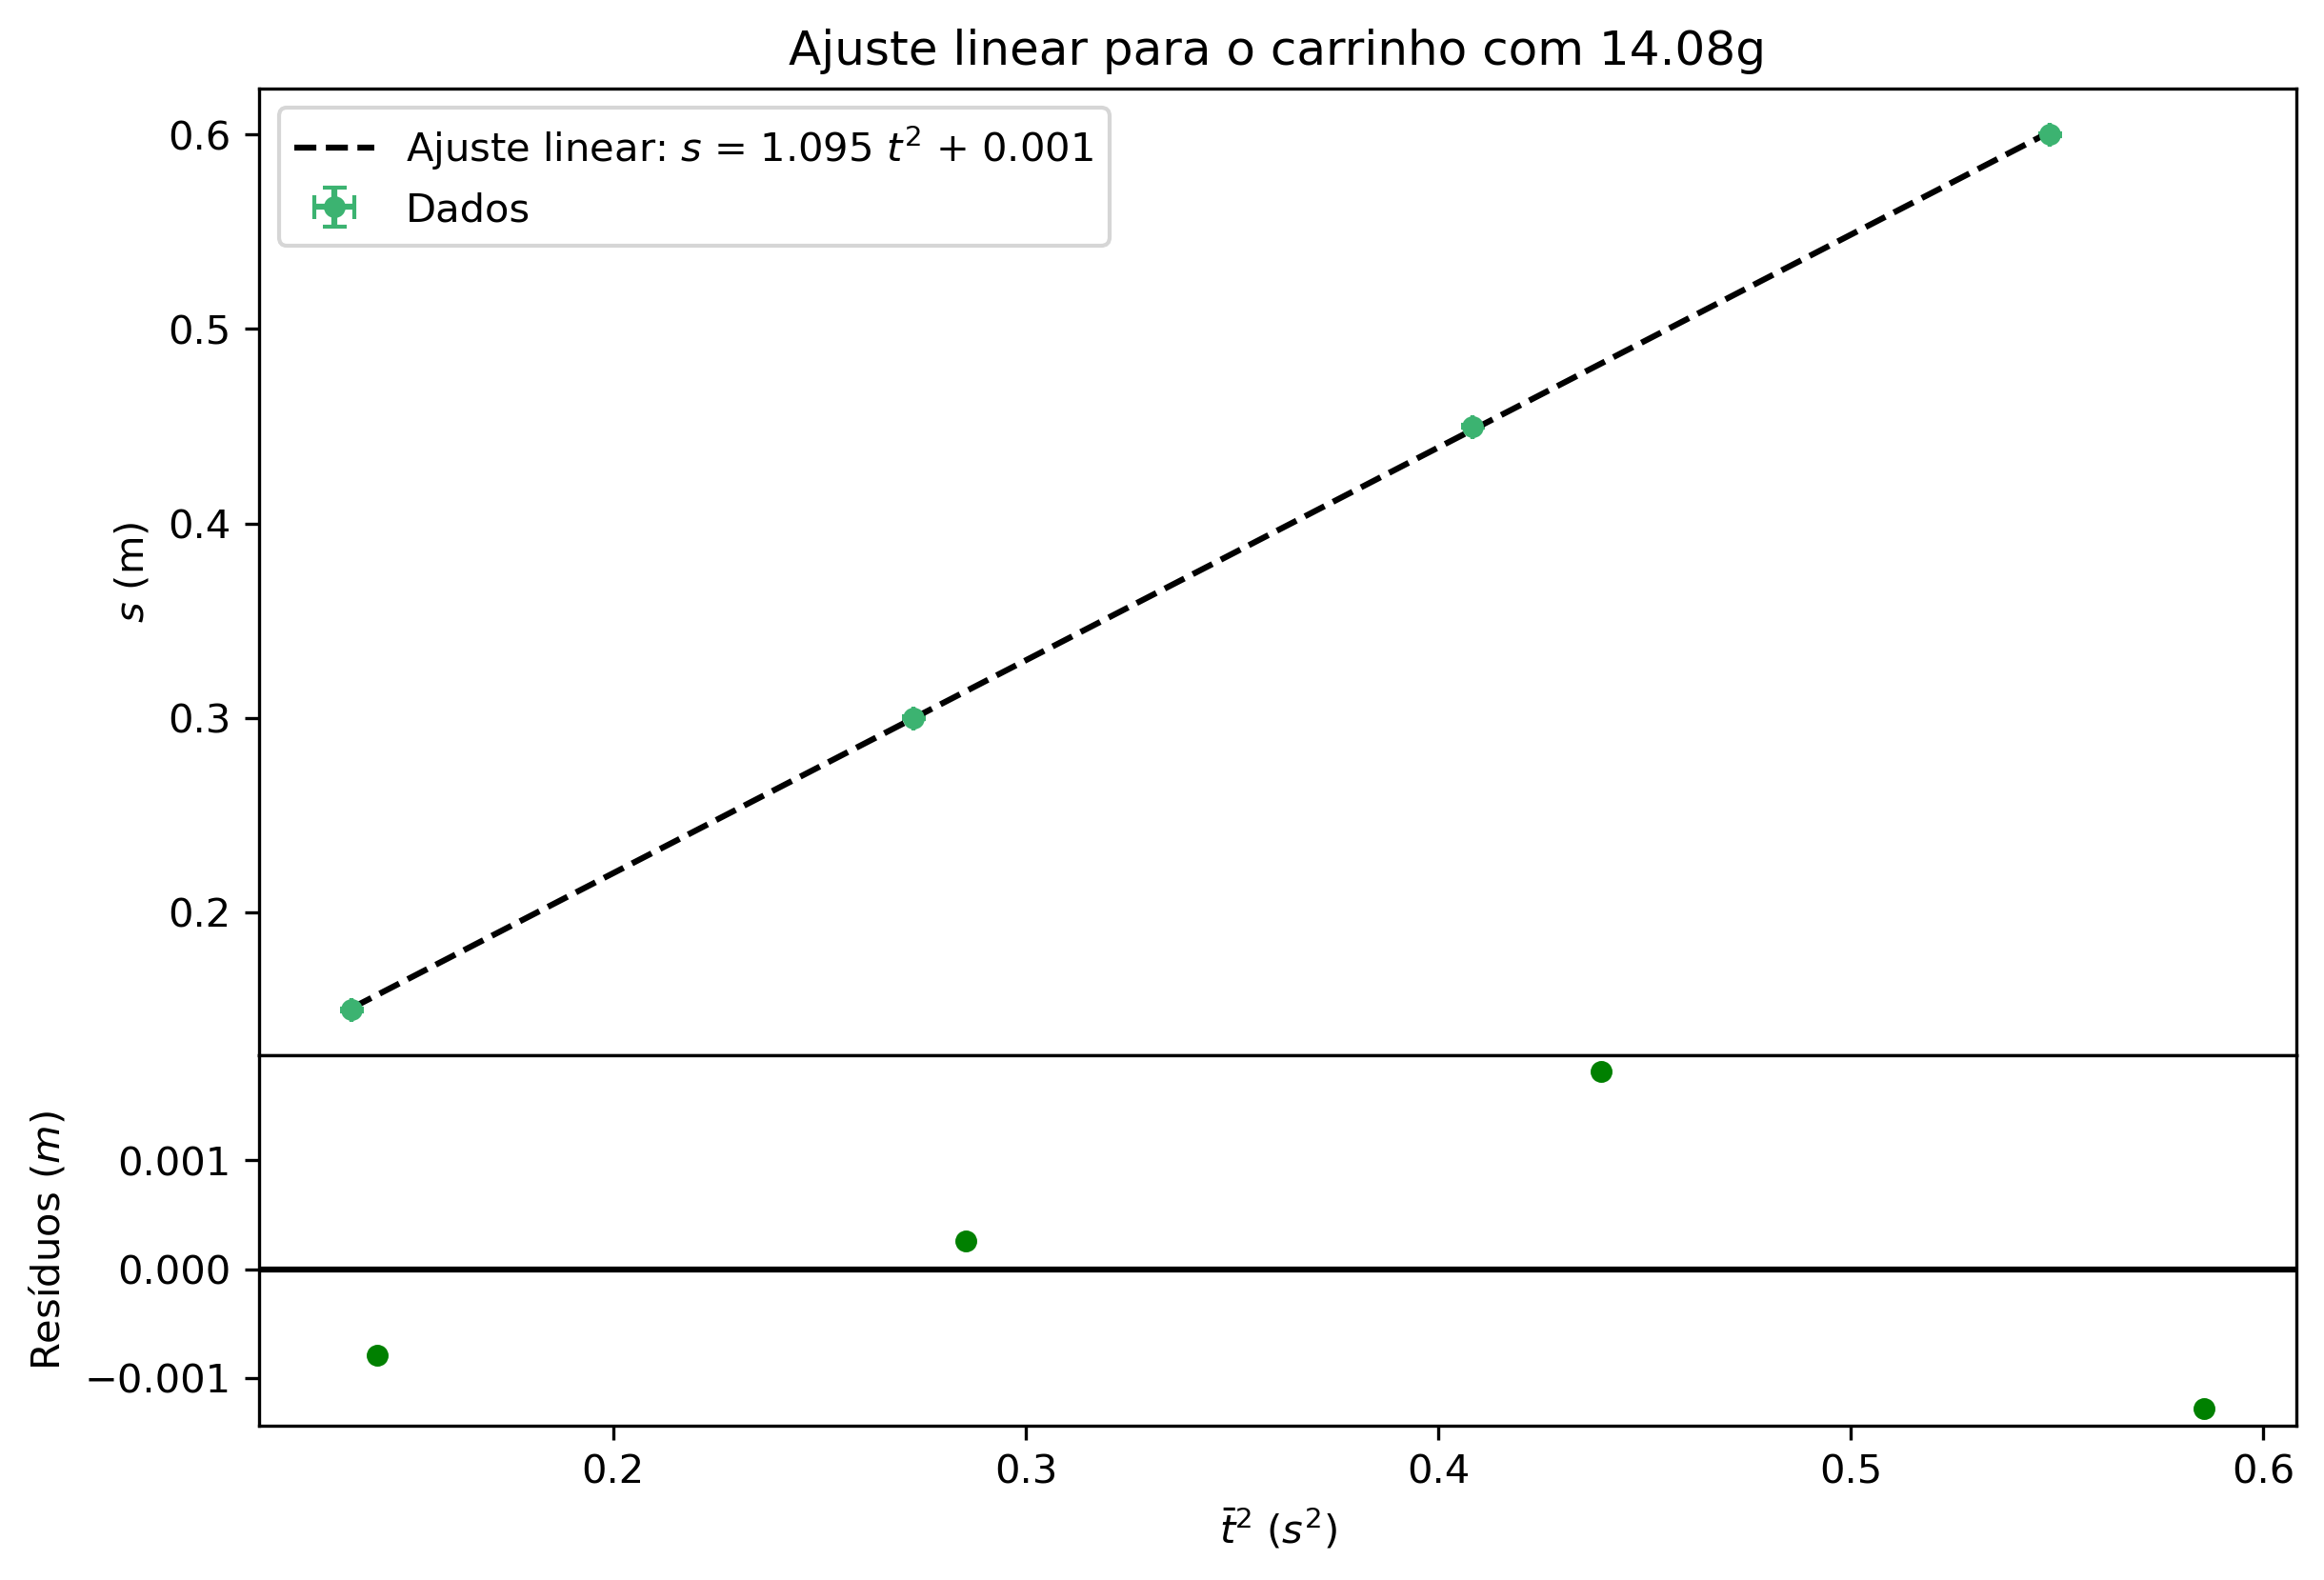

In [65]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_7, t_sq_7)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_7,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(t_sq_7,t_sq_7*coef_angular_7 + coef_linear_7, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.3f $t^2$ + %.3f' % (coef_angular_7,abs(coef_linear_7)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 14.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Ajuste linear para os dados do carrinho com 6g de cada lado

In [66]:
fitpars_6, cov_pars_6 = np.polyfit(t_sq_6,s,1,w=np.power(sigma_s,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular_6 = fitpars_6[0]
coef_linear_6 = fitpars_6[1]
sigma_angular_6 = np.sqrt(cov_pars_6[0][0])
sigma_linear_6 = np.sqrt(cov_pars_6[1][1])

sigma_angular_6 = float('{:g}'.format(float('{:.1g}'.format(sigma_angular_6))))
sigma_linear_6 = float('{:g}'.format(float('{:.1g}'.format(sigma_linear_6))))

                     
print('Coeficiente angular: %.3f +- %.3f (m/s^2)' % (coef_angular_6 ,sigma_angular_6))
print('Coeficiente linear: %.3f +- %.3f (m)' %(coef_linear_6,sigma_linear_6))

Coeficiente angular: 1.139 +- 0.009 (m/s^2)
Coeficiente linear: -0.002 +- 0.003 (m)


chi^2_red = 15.024


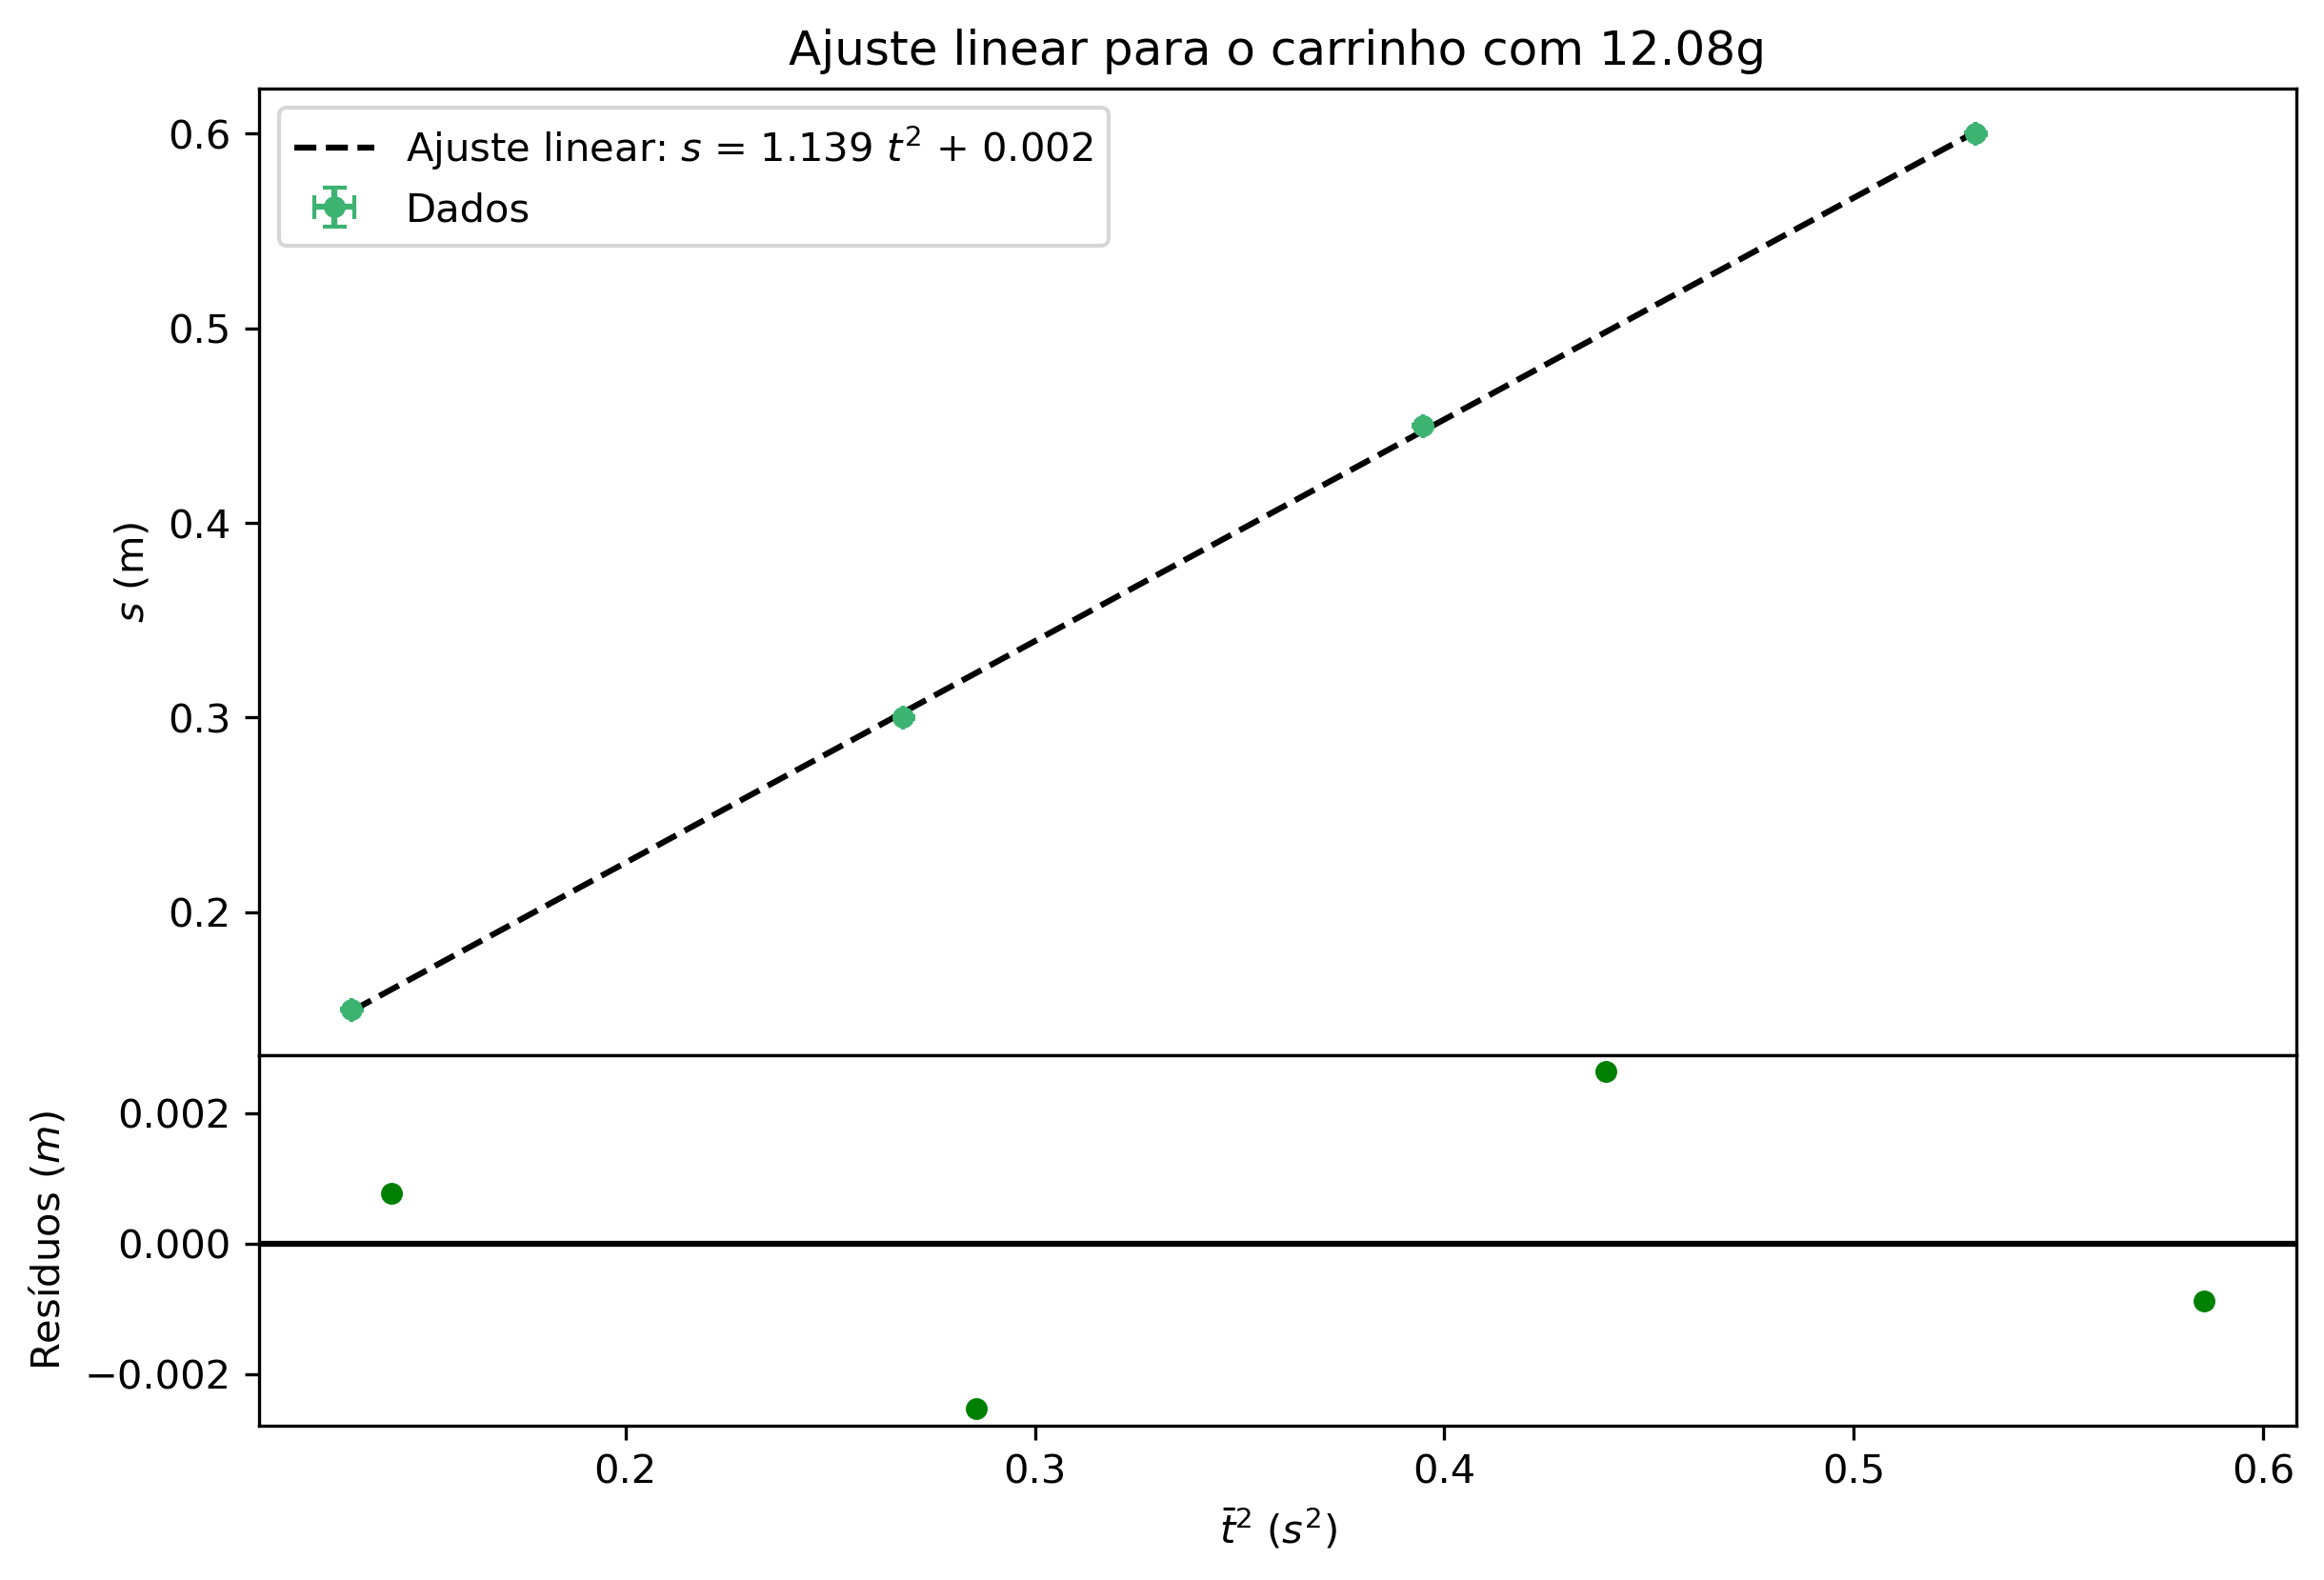

In [67]:
# Calulando chi^2_red
yhat1 = np.polyval(fitpars_6, t_sq_6)
chi_squared = np.sum(((yhat1 - s)/sigma_s) ** 2)
chi2_red = chi_squared/(len(s)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

fig = plt.figure(figsize = [9.2,6.2], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(t_sq_6,s, sigma_s,0, 'o', ms = 4.5, capsize=3, color = 'mediumseagreen', label = 'Dados')
axs[0].plot(t_sq_6,t_sq_6*coef_angular_6 + coef_linear_6, color ='black', ls = '--',
         label = r'Ajuste linear: $s$ = %.3f $t^2$ + %.3f' % (coef_angular_6,abs(coef_linear_6)))
axs[0].set_ylabel(r'$s$ (m)')
axs[0].legend()
axs[0].set_title('Ajuste linear para o carrinho com 12.08g')

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (s - yhat1)
axs[1].plot(t_sq_9, resid, 'o',ms = 4.5,  color = 'green', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($m$)")




plt.xlabel(r'$\bar{t}^2$ ($s^2$)')
#plt.savefig('Graphs/ESR/AjusteResiduos_LD.pdf', dpi = 300)

plt.show()

# Obtendo a aceleração através do coeficiente angular:


Conforme discutido na introdução, a mecânica Newtoniana prevê que a relação entre o deslocamento e o tempo é dada pela seguinte equação:

$$s = \frac{a}{2}t^2$$

Comparando com o ajuste $s = c_a \bar{t}^2 + c_l$, nós vemos que o coeficiente angular corresponde a metade da aceleração do carrinho:

$$c_a = \frac{a}{2}$$

Além disto, vemos que o esperado para a teoria é que o coeficiente linear seja nulo. A fim de encontrarmos a aceleração do carrinho, podemos isolá-la na equação acima:

$$a = 2c_a$$

A incerteza associada a aceleração é obtida através da propagação do erro do coeficiente angular da seguinte forma:

$$\sigma_a = \bigg\vert\frac{d a}{dc_a}\bigg\vert\sigma_{c_a} = 2\bigg\vert\frac{d c_a}{dc_a}\bigg\vert\sigma_{c_a} = 2\sigma_{c_a}$$

In [69]:
#Aceleração para o conjunto de dados do carrinho com 10g de cada lado:
a_10 = 2*coef_angular_10
sigma_a_10 = 2*sigma_angular_10

print('a_20 = (%.2f +- %.2f) m/s^2' % (a_10, sigma_a_10))

#Aceleração para o conjunto de dados do carrinho com 9g de cada lado:

a_9 = 2*coef_angular_9
sigma_a_9 = 2*sigma_angular_9

print('a_18 = (%.2f +- %.2f) m/s^2' % (a_9, sigma_a_9))

#Aceleração para o conjunto de dados do carrinho com 8g de cada lado:

a_8 = 2*coef_angular_8
sigma_a_8 = 2*sigma_angular_8

print('a_16 = (%.2f +- %.2f) m/s^2' % (a_8, sigma_a_8))

#Aceleração para o conjunto de dados do carrinho com 7g de cada lado:

a_7 = 2*coef_angular_7
sigma_a_7 = 2*sigma_angular_7

print('a_14 = (%.2f +- %.2f) m/s^2' % (a_7, sigma_a_7))

#Aceleração para o conjunto de dados do carrinho com 6g de cada lado:

a_6 = 2*coef_angular_6
sigma_a_6 = 2*sigma_angular_6

print('a_12 = (%.2f +- %.2f) m/s^2' % (a_6, sigma_a_6))

#criando um vetor com as acelerações:

a = [a_10, a_9, a_8, a_7, a_6]

a_20 = (1.95 +- 0.02) m/s^2
a_18 = (2.02 +- 0.02) m/s^2
a_16 = (2.09 +- 0.02) m/s^2
a_14 = (2.19 +- 0.01) m/s^2
a_12 = (2.28 +- 0.02) m/s^2


# Calculando a força resultante em cada caso

A força resultante é a força peso na massa suspensa:

$$F_r = P_s = m_s \ g$$

Sua incerteza é obtida através da propagação associada ao erro da massa suspensa:

$$\sigma_{F_r} = \bigg\vert\frac{d F_r}{d m_s}\bigg\vert \sigma_{m_s} = \bigg\vert\frac{d m_s \ g}{d m_s}\bigg\vert \sigma_{m_s} = g \ \sigma_{m_s}$$


$$\sigma_{F_r} = \sqrt{\left(\frac{\partial F_r}{\partial m_c}\right)^2 \sigma_{m_c}^2 + \left(\frac{\partial F_r}{\partial m_s}\right)^2 \sigma_{m_s}^2 + \left(\frac{\partial F_r}{\partial a}\right)^2 \sigma_{a}^2 }$$


$$\sigma_{F_r} = \sqrt{\left(\frac{\partial (m_c + m_s)a}{\partial m_c}\right)^2 \sigma_{m_c}^2 + \left(\frac{\partial (m_c + m_s)a}{\partial m_s}\right)^2 \sigma_{m_s}^2 + \left(\frac{\partial (m_c + m_s)a}{\partial a}\right)^2 \sigma_{a}^2 }$$

$$\sigma_{F_r} = \sqrt{\left(a\sigma_{m_c}\right)^2  + \left(a\sigma_{m_s}\right)^2  + \left((m_c + m_s)\sigma_{a}\right)^2  }$$
$$\sigma_{F_r} = \sqrt{a^2\left(\sigma_{m_c}^2 + \sigma_{m_s}^2\right)   + \left((m_c + m_s)\sigma_{a}\right)^2  }$$